<a href="https://colab.research.google.com/github/SinghNavnoor/Classification_prediction_of_income/blob/main/classification_of_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning

Navnoor Singh Kahlon

### Importing Data

In [81]:
import pandas as pd

column_names = ["age","workclass","fnlwgt","education","educational-num", "marital-status",'occupation',"relationship","race","gender,capital-gain","capital-loss","hours-per-week","native-country","income"]
df = pd.read_csv('adult_2.csv',header=0)

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Looking at the shape of the dataset.

In [82]:
df.shape

(48842, 15)

### Listing all the Columns.

In [83]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


### Looking for duplicates

In [84]:
#summing the total number of duplicates
df.duplicated().sum()


52

In [85]:
#dropping all duplicates
df.drop_duplicates(inplace=True)

In [86]:
#confirming no more duplicates exist in the dataset
df.duplicated().sum()

0

### Confirming dtypes are correct. 

In [87]:
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [89]:
#understanding the "Income" column
df['income'].value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

#### Income column is a binary categorical column. 

##### This column will be our Target Column. 

### Looking for missing values.

In [90]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

No missing values.

### Looking for any inconsistencies 

#### Inconsistencies in Object type column

In [91]:
#Looping through all the columns and looking for any inconsistencies.
all_columns = df.columns
data_types = df.dtypes

for i in all_columns:
  if df[i].dtypes == object:
    print(f'The count values for {i} are:')
    print(df[i].value_counts())
    print('-----------------------------------------------')
    print('\n______')

The count values for workclass are:
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
-----------------------------------------------

______
The count values for education are:
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64
-----------------------------------------------

______
The count values for marital-status are:
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widow

#### Three object type columns have '?' as one of their class types. These could be considered null values. 
#### I will be turning "?" into np.nan and then that will be imputed accordingly during the model building. 
##### Columns I will be creating null values for are:
- **occupation**
- **workclass**
- **native-country**

In [92]:
#importing numpy
import numpy as np

#changing "?" to np.nan for workclass
df['workclass'] = df['workclass'].replace({'?': np.nan})
#changing "?" to np.nan for occupation
df['occupation'] = df['occupation'].replace({'?': np.nan})
#changing "?" to np.nan for native-country
df['native-country'] = df['native-country'].replace({'?': np.nan})

In [93]:
#confirming the changes have made for workclass, occupation and native-country
df.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

- **Now we have actual missing values that will be handled during model building.**

- **We do not have any inconsistencies in the Object type columns.**

#### Inconsistencies in Numeric type column

In [94]:
#Looping through all the columns and looking for any inconsistencies.
all_columns = df.columns
data_types = df.dtypes

for i in all_columns:
  if df[i].dtypes == 'int64':
    print(f'The count values for {i} are:')
    print(df[i].value_counts())
    print('-----------------------------------------------')
    print('\n___')

The count values for age are:
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
-----------------------------------------------

___
The count values for fnlwgt are:
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
293579     1
114874     1
96279      1
509350     1
257302     1
Name: fnlwgt, Length: 28523, dtype: int64
-----------------------------------------------

___
The count values for educational-num are:
9     15770
10    10863
13     8013
14     2656
11     2060
7      1812
12     1601
6      1389
4       954
15      834
5       756
8       655
16      594
3       507
2       245
1        81
Name: educational-num, dtype: int64
-----------------------------------------------

___
The count values for capital-gain are:
0        44755
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040  

- **There are no inconsistencies in the numeric columns**

### Summary stats

In [95]:
#Creating another loop to get the summary stats of Numerical columns. 
for i in all_columns:
  if df[i].dtypes == int:
    m = df[i].mean()
    max = df[i].max()
    min = df[i].min()
    mode = df[i].mode()
    print(f"{df[i].name.capitalize()}:")
    print(f'Mean = {m}, Max = {max}, Min = {min}')
    print('--------------' * 4)
    print('\n')

Age:
Mean = 38.652797704447636, Max = 90, Min = 17
--------------------------------------------------------


Fnlwgt:
Mean = 189668.9993646239, Max = 1490400, Min = 12285
--------------------------------------------------------


Educational-num:
Mean = 10.07880713260914, Max = 16, Min = 1
--------------------------------------------------------


Capital-gain:
Mean = 1080.21768805083, Max = 99999, Min = 0
--------------------------------------------------------


Capital-loss:
Mean = 87.59557286329166, Max = 4356, Min = 0
--------------------------------------------------------


Hours-per-week:
Mean = 40.42588645214183, Max = 99, Min = 1
--------------------------------------------------------




- No visible inconsistencies in the numeric columns. 

## Exploratory Visualizations

### Univariate Visualizations

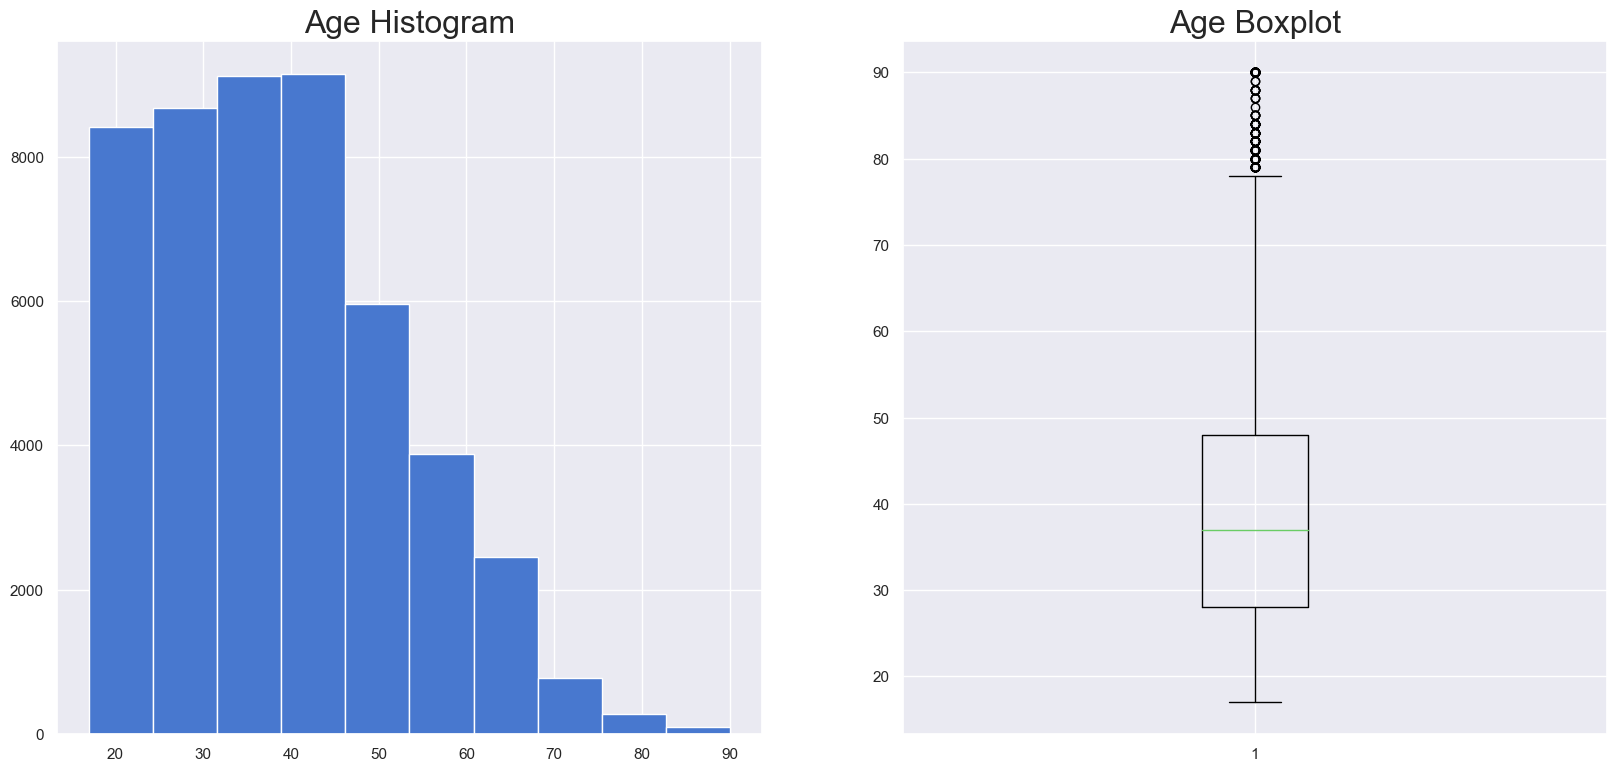

In [96]:
import matplotlib.pyplot as plt
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['age'].values);
plt.title('Age Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['age'].values);
plt.title('Age Boxplot', fontsize=23);

- Age histogram is right skewed, showing the usual trend of working age people.
- In the boxplot, we can see that after the age of 77 we have outliers that go all the way up to 90 years. 

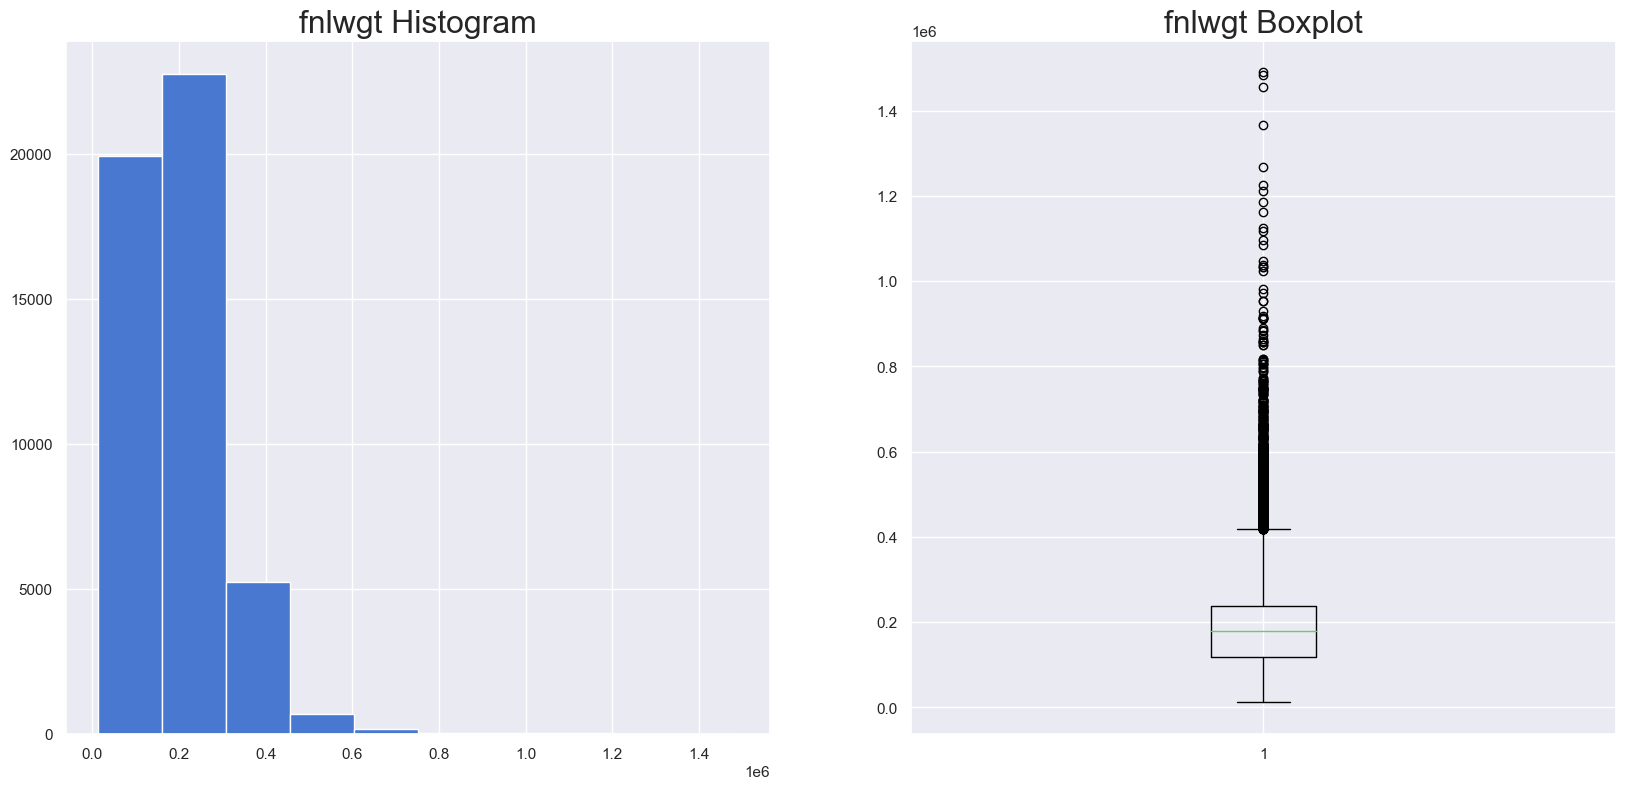

In [97]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['fnlwgt'].values);
plt.title('fnlwgt Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['fnlwgt'].values);
plt.title('fnlwgt Boxplot', fontsize=23);

- The fnlwgt is heavily right skewed. 
- The boxplot shows many outliers. This could indicate that few people have assets that offset their liabilities.

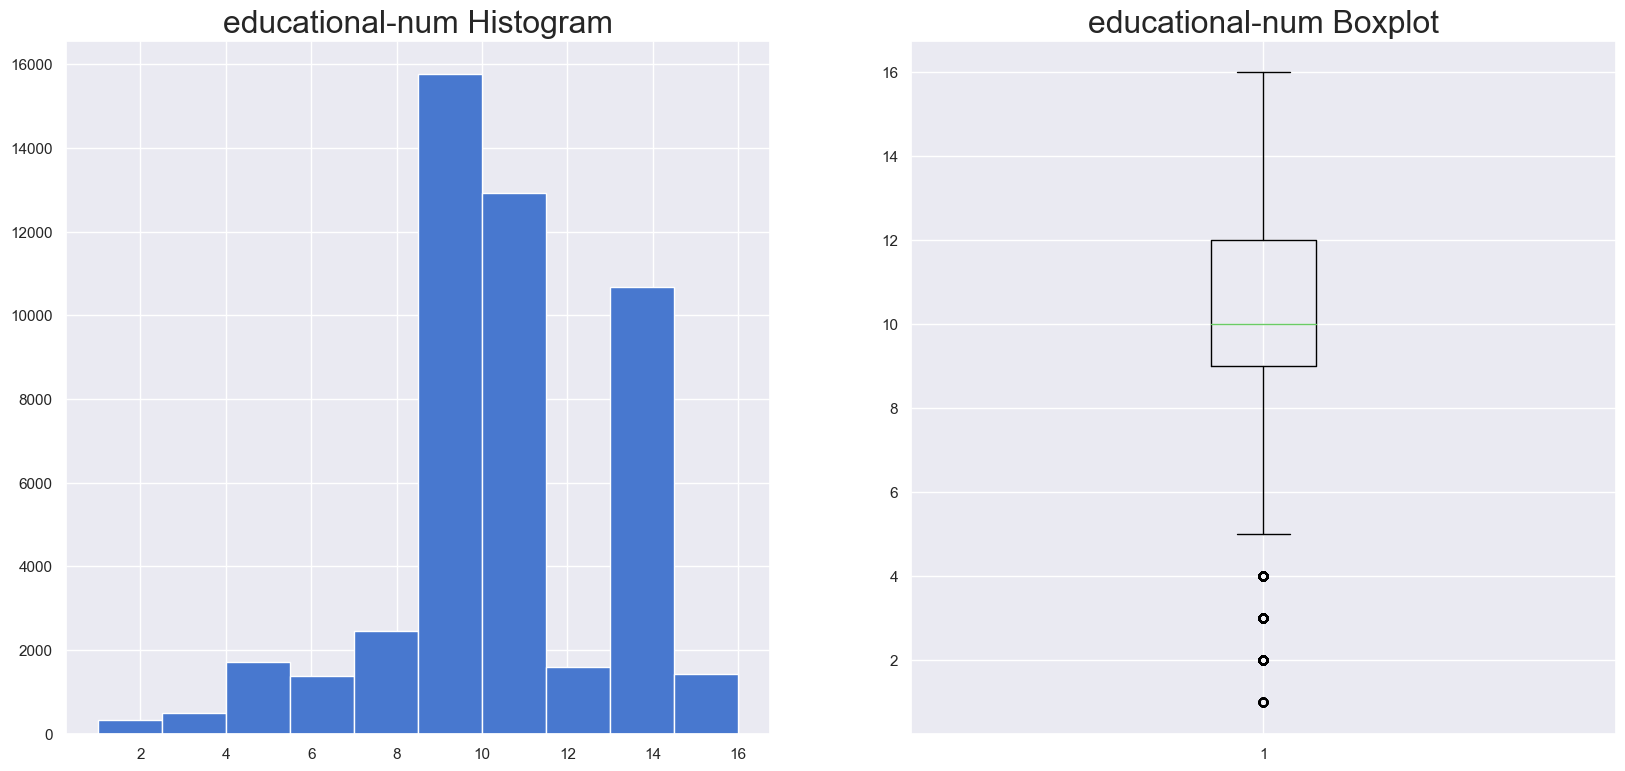

In [98]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['educational-num'].values);
plt.title('educational-num Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['educational-num'].values);
plt.title('educational-num Boxplot', fontsize=23);

- The histogram is well within the reality that most people get about 10 - 14 years of education. 
- The outliers in the boxplot shows us that some individuals only received about 1 - 4 years of education. It will be interesting to know what countries is that for. 

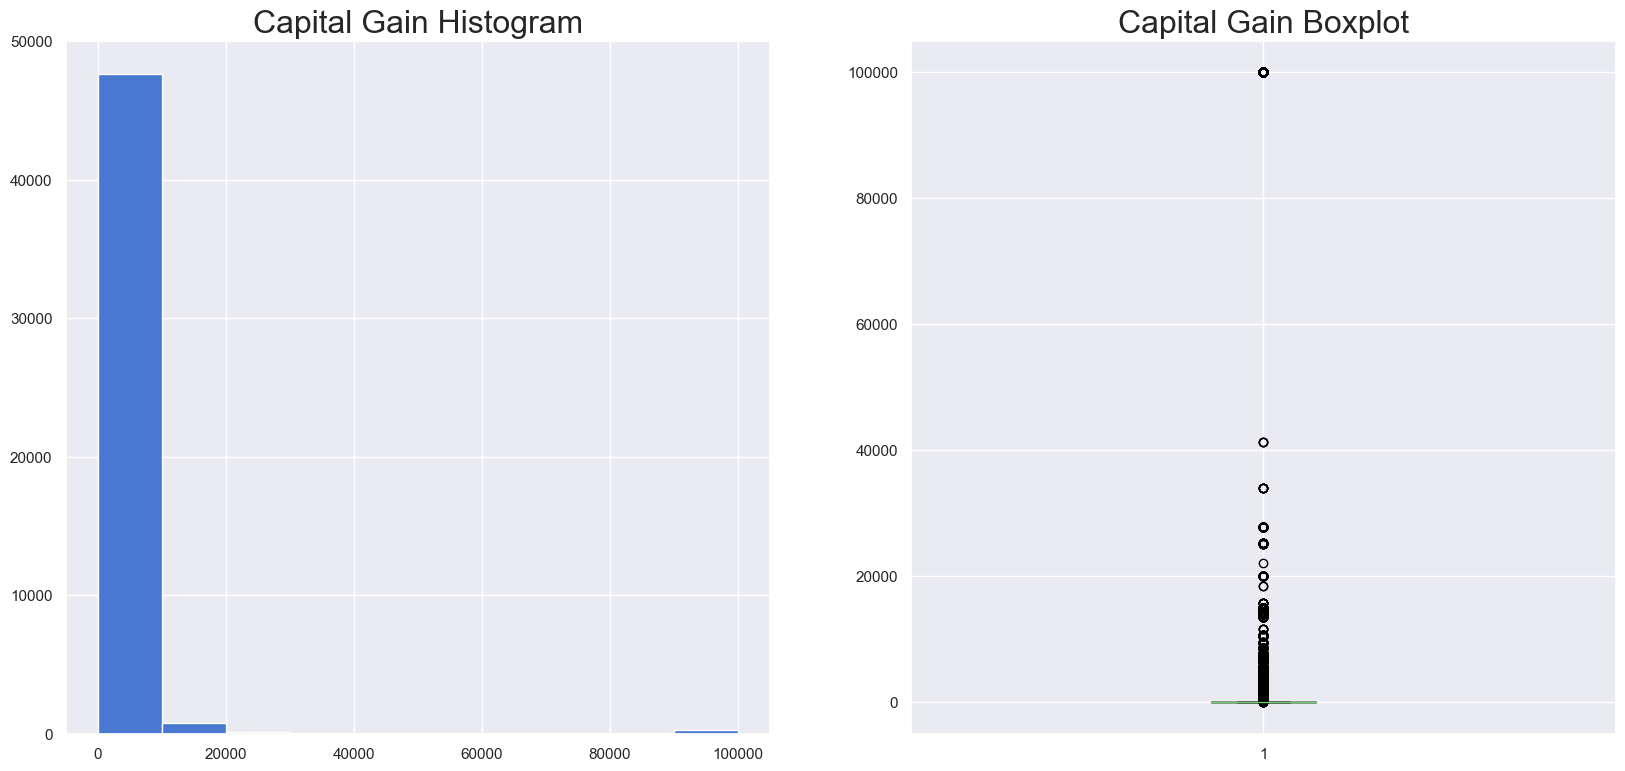

In [99]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['capital-gain'].values);
plt.title('Capital Gain Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['capital-gain'].values);
plt.title('Capital Gain Boxplot', fontsize=23);

- Capital gains have majority of its values at or near 0. The model can learn important thing about income inequality. 
- In the boxplot, we can see that the outliears are spread very wide. This confirms the idea of income inequality as well. 

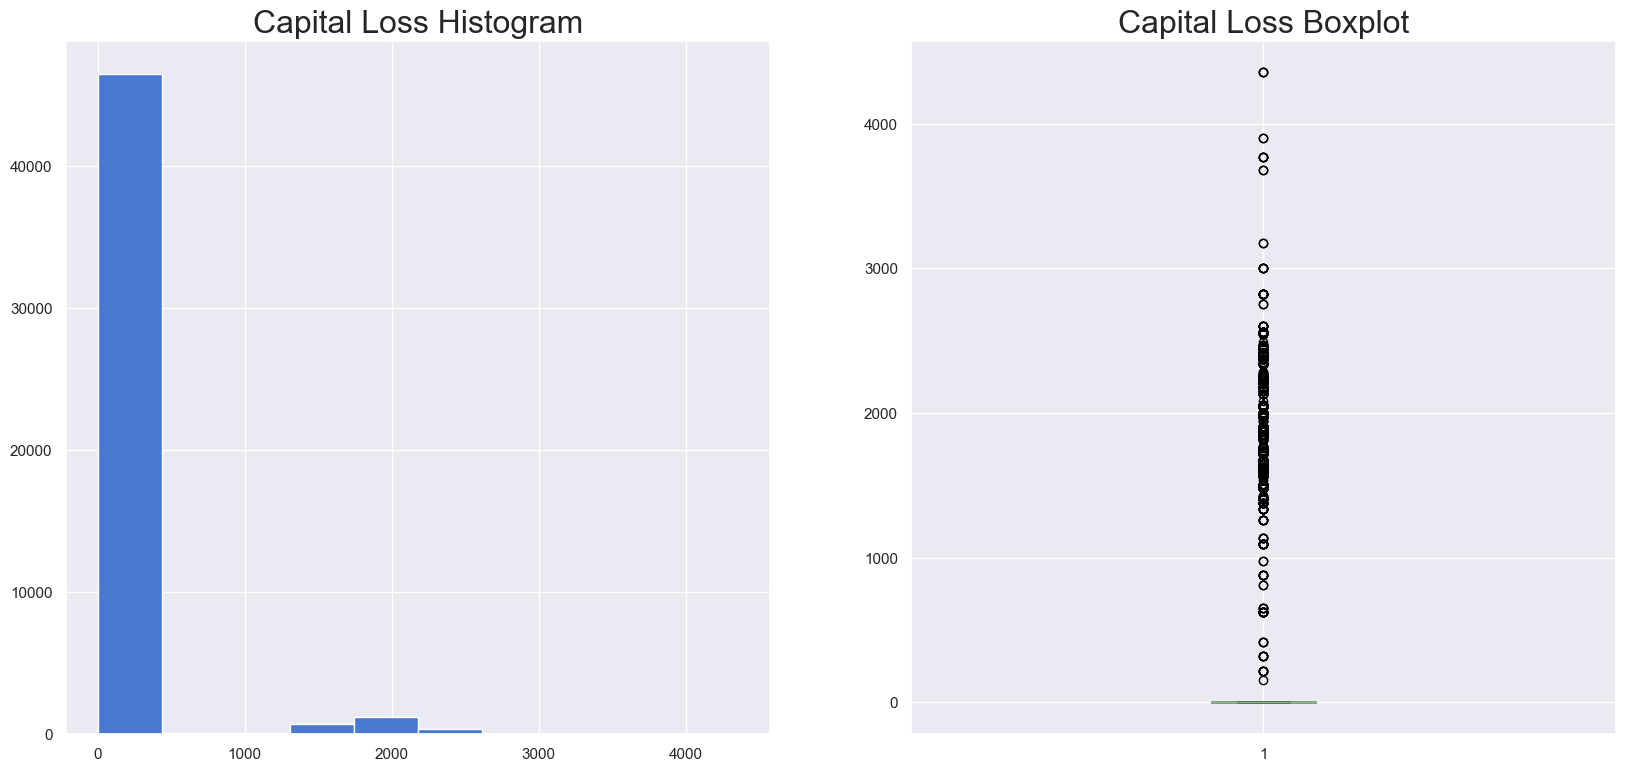

In [100]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['capital-loss'].values);
plt.title('Capital Loss Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['capital-loss'].values);
plt.title('Capital Loss Boxplot', fontsize=23);

- The histogram shows us that most people did not have a capital loss.
- The boxplot shows us many individuals as outliers with very high capital losses.

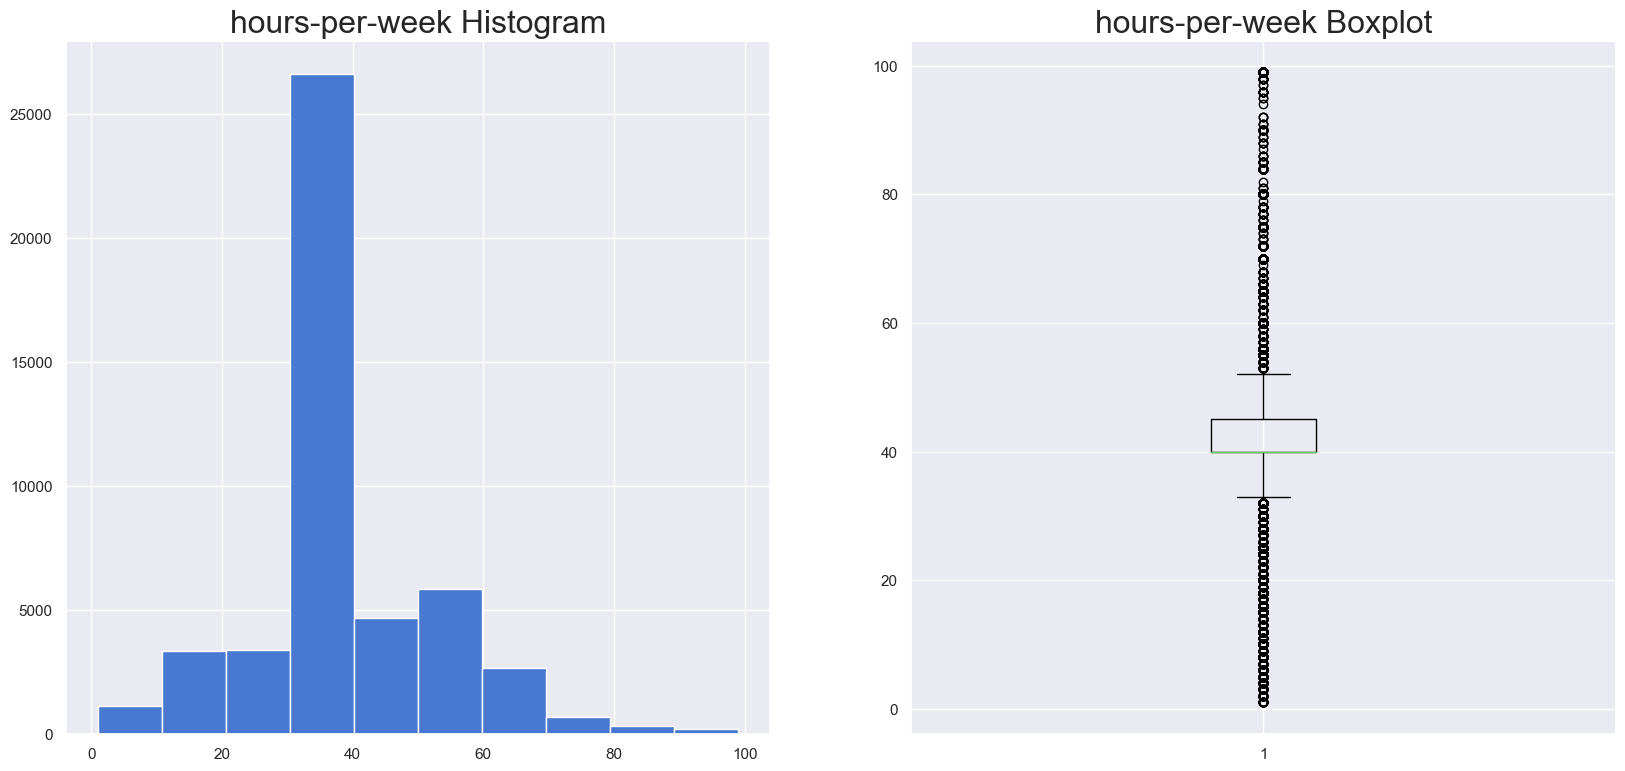

In [101]:
#Setting the figure size:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['hours-per-week'].values);
plt.title('hours-per-week Histogram', fontsize=23);

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['hours-per-week'].values);
plt.title('hours-per-week Boxplot', fontsize=23);

- The histogram is normally distributed with a peak at 40. 
- However, the boxplot shows us that the number of hours people work differ a lot. The outliers stretch to the limits of 0 hours up to 100 hours. 

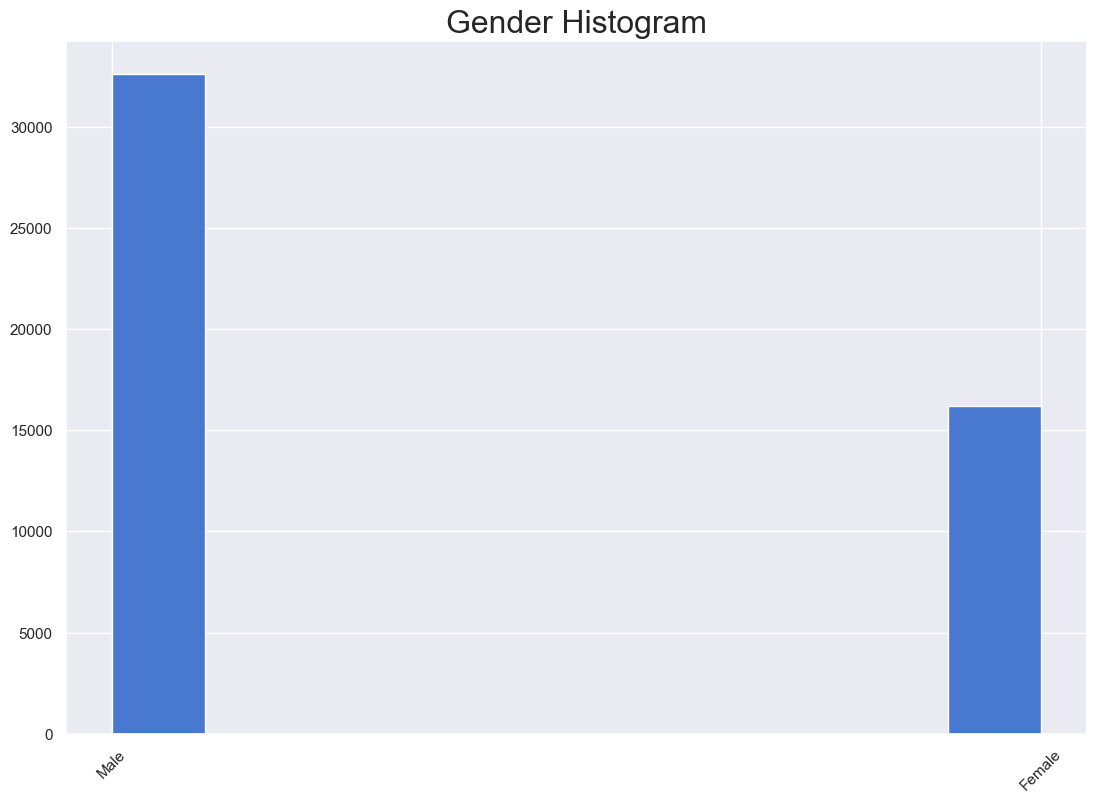

In [102]:
#Setting the figure size:
plt.figure(figsize = (29,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['gender'].values);
plt.title('Gender Histogram', fontsize=23);
plt.xticks(rotation = 45);

- Majority of the samples of data are of men. 

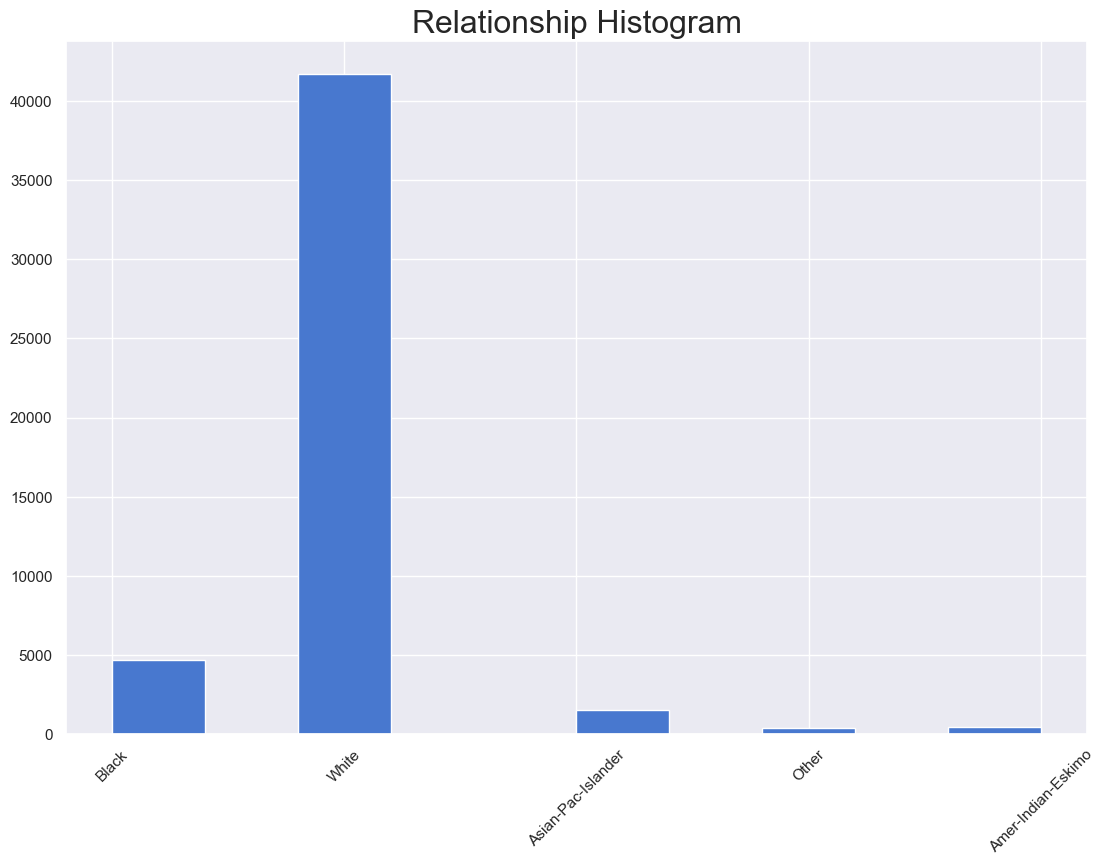

In [103]:
#Setting the figure size:
plt.figure(figsize = (29,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['race'].values);
plt.title('Relationship Histogram', fontsize=23);
plt.xticks(rotation = 45);

- This shows us that the dataset is overwhelmed by people of White race. This could be a problem as we won't have a model that can predict for a wide range of races. 

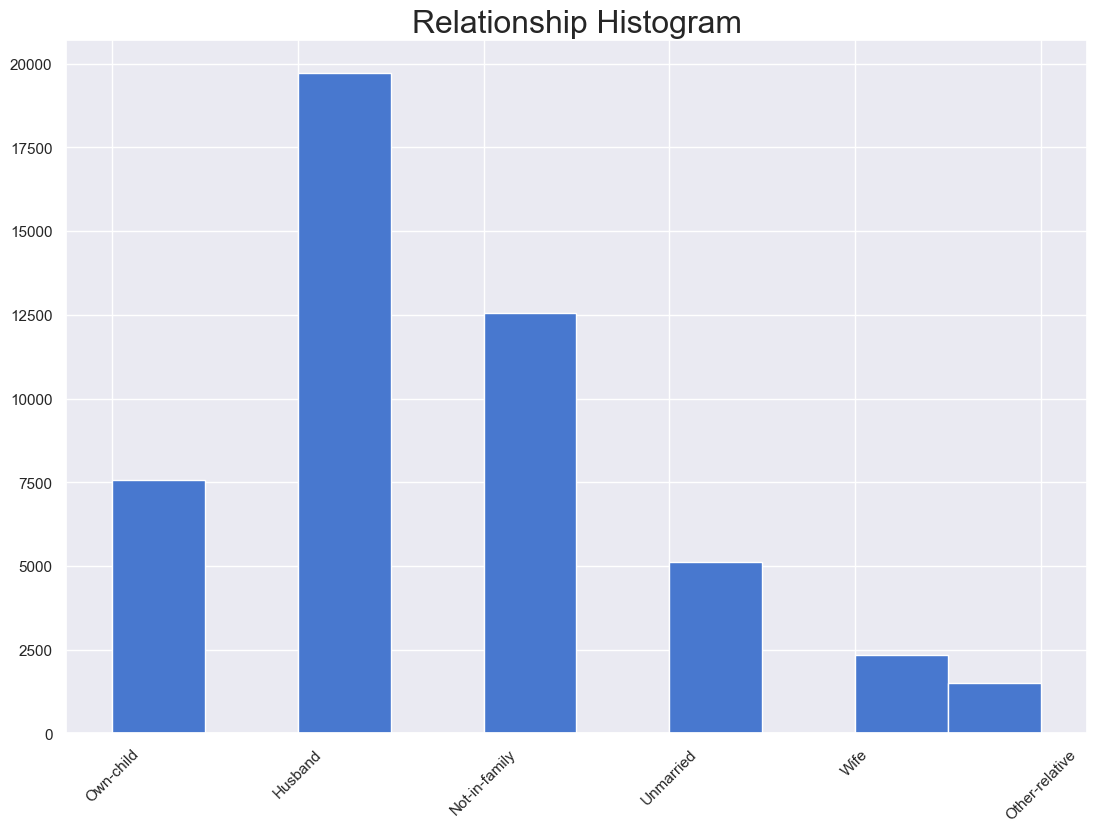

In [104]:
#Setting the figure size:
plt.figure(figsize = (29,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['relationship'].values);
plt.title('Relationship Histogram', fontsize=23);
plt.xticks(rotation = 45);

- Majority of the sampled individuals are either husbands or Not in family type. 

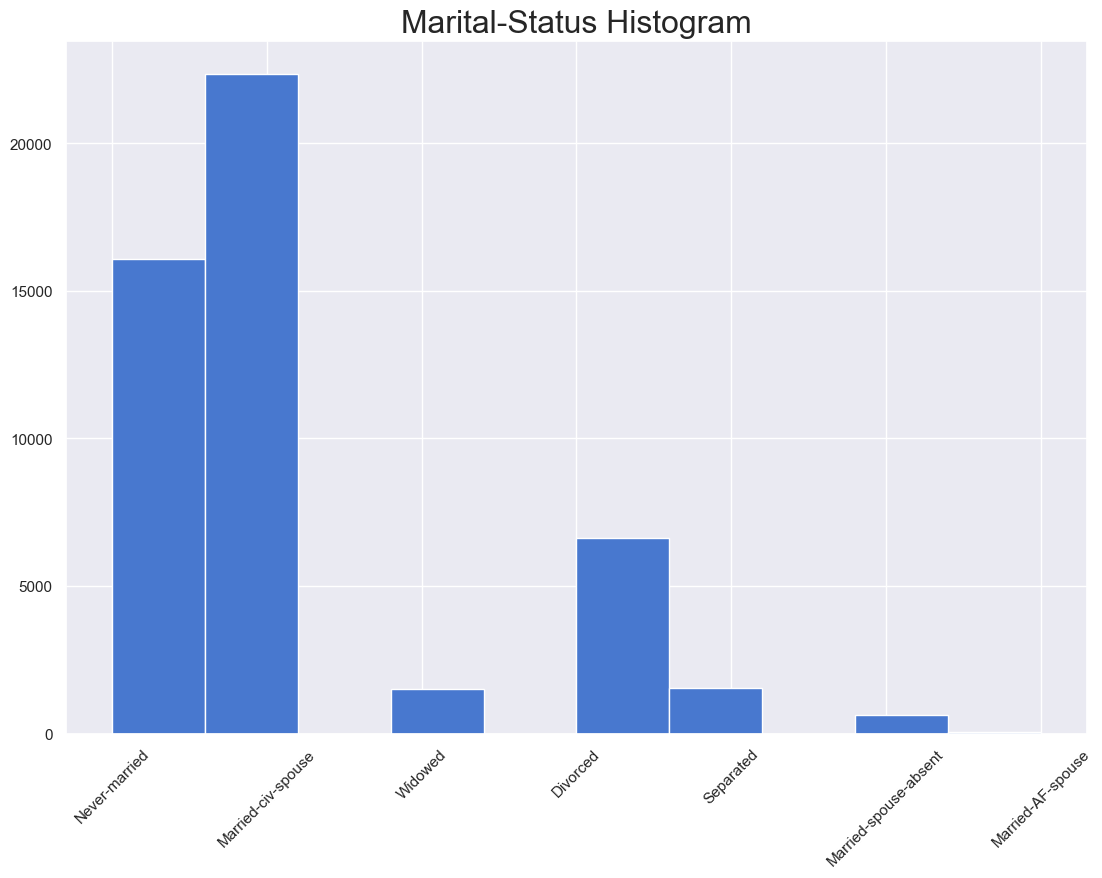

In [105]:
#Setting the figure size:
plt.figure(figsize = (29,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['marital-status'].values);
plt.title('Marital-Status Histogram', fontsize=23);
plt.xticks(rotation = 45);

- Majority of the samples we have are of people who have either never married or Married-civ-spouse.

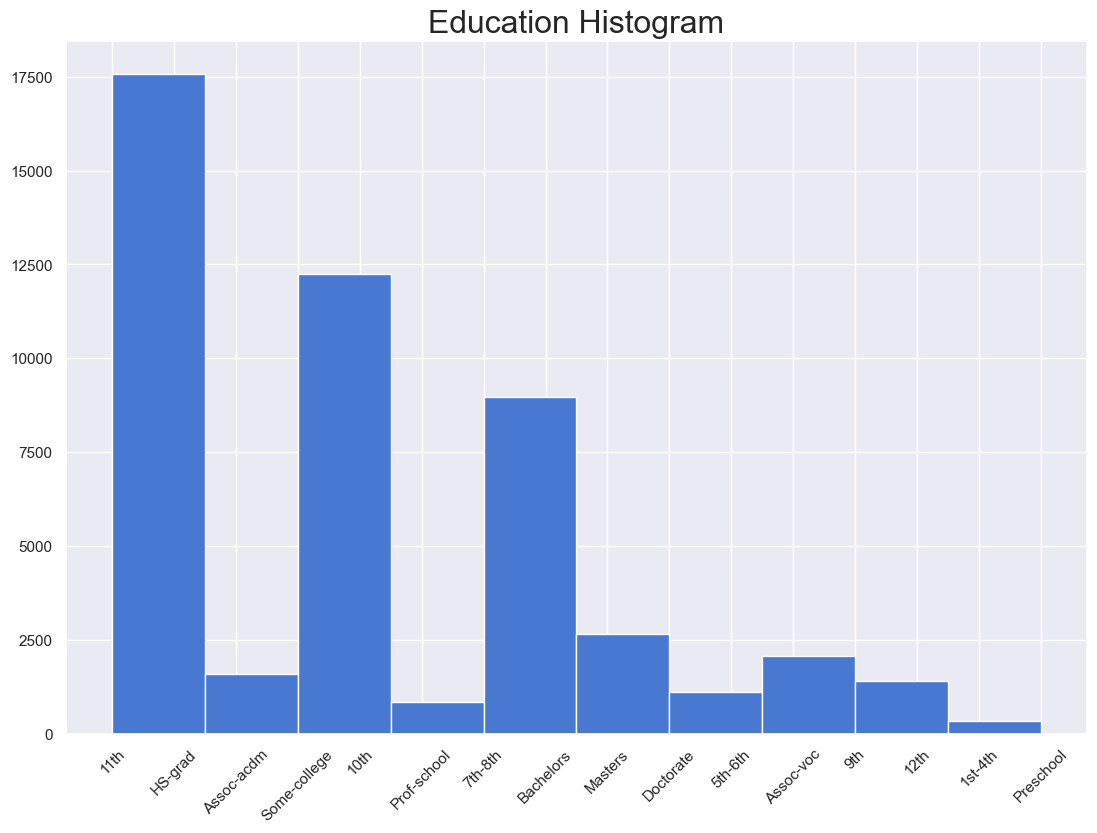

In [106]:
#Setting the figure size:
plt.figure(figsize = (29,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['education'].values);
plt.title('Education Histogram', fontsize=23);
plt.xticks(rotation = 45);

- The education histogram peaks at High School, Some College, and Bachelors education.
- The number of individuals who gained education beyond Bachelors is very low comparatively.

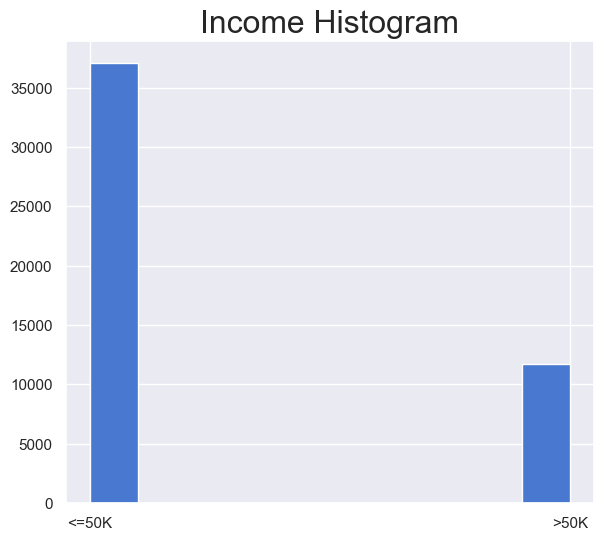

In [107]:
#Setting the figure size:
plt.figure(figsize = (15,6))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['income'].values);
plt.title('Income Histogram', fontsize=23);


- The histogram of the target column shows us that most indiviuals make below 50 thousand dollars. 
- Individuals who make more than 50 thousand dollars are one third of its counterpart. 

## Multi-variate Exploration

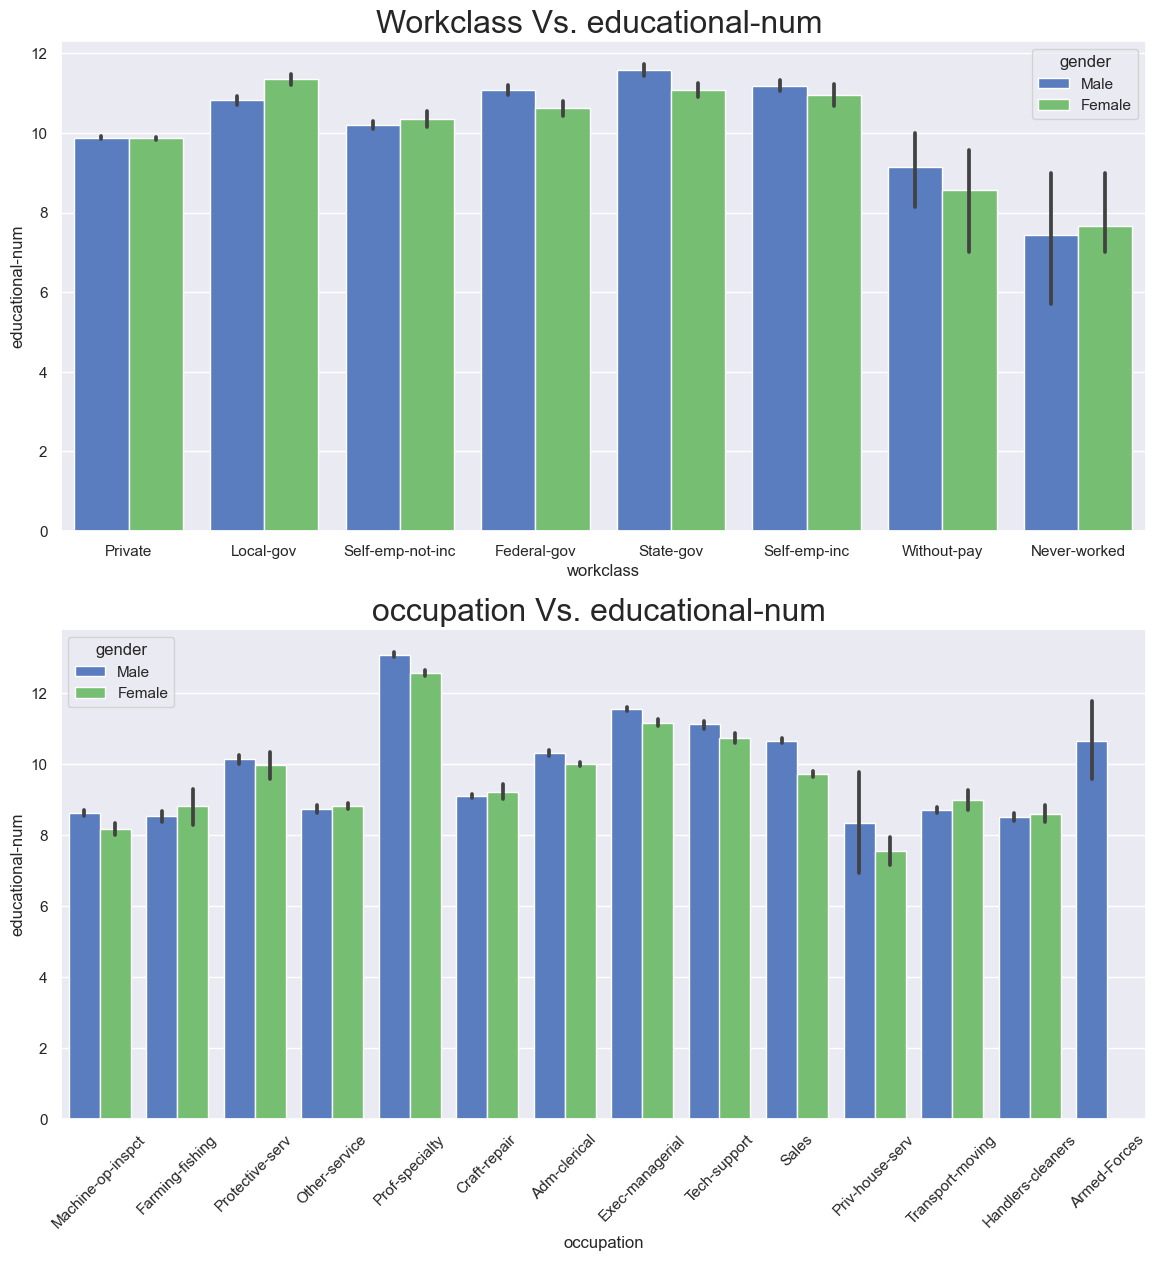

In [108]:
import seaborn as sns
#Setting the figure size:
plt.figure(figsize = (14,14))

#Barplot
plt.subplot(2, 1, 1);
sns.barplot(x = 'workclass', y = 'educational-num', hue = 'gender', data = df);
plt.title('Workclass Vs. educational-num ', fontsize= 23);

#Barplot
plt.subplot(2, 1, 2);
sns.barplot(x = 'occupation', y = 'educational-num',hue = 'gender', data = df);
plt.title('occupation Vs. educational-num ', fontsize= 23);
plt.xticks(rotation = 45);



- For most workclasses and occupations the number of years of education between men and women are a mix. 
- The biggest outlier is the education number for Armed Forces. This data suggests that women do not go in this field.

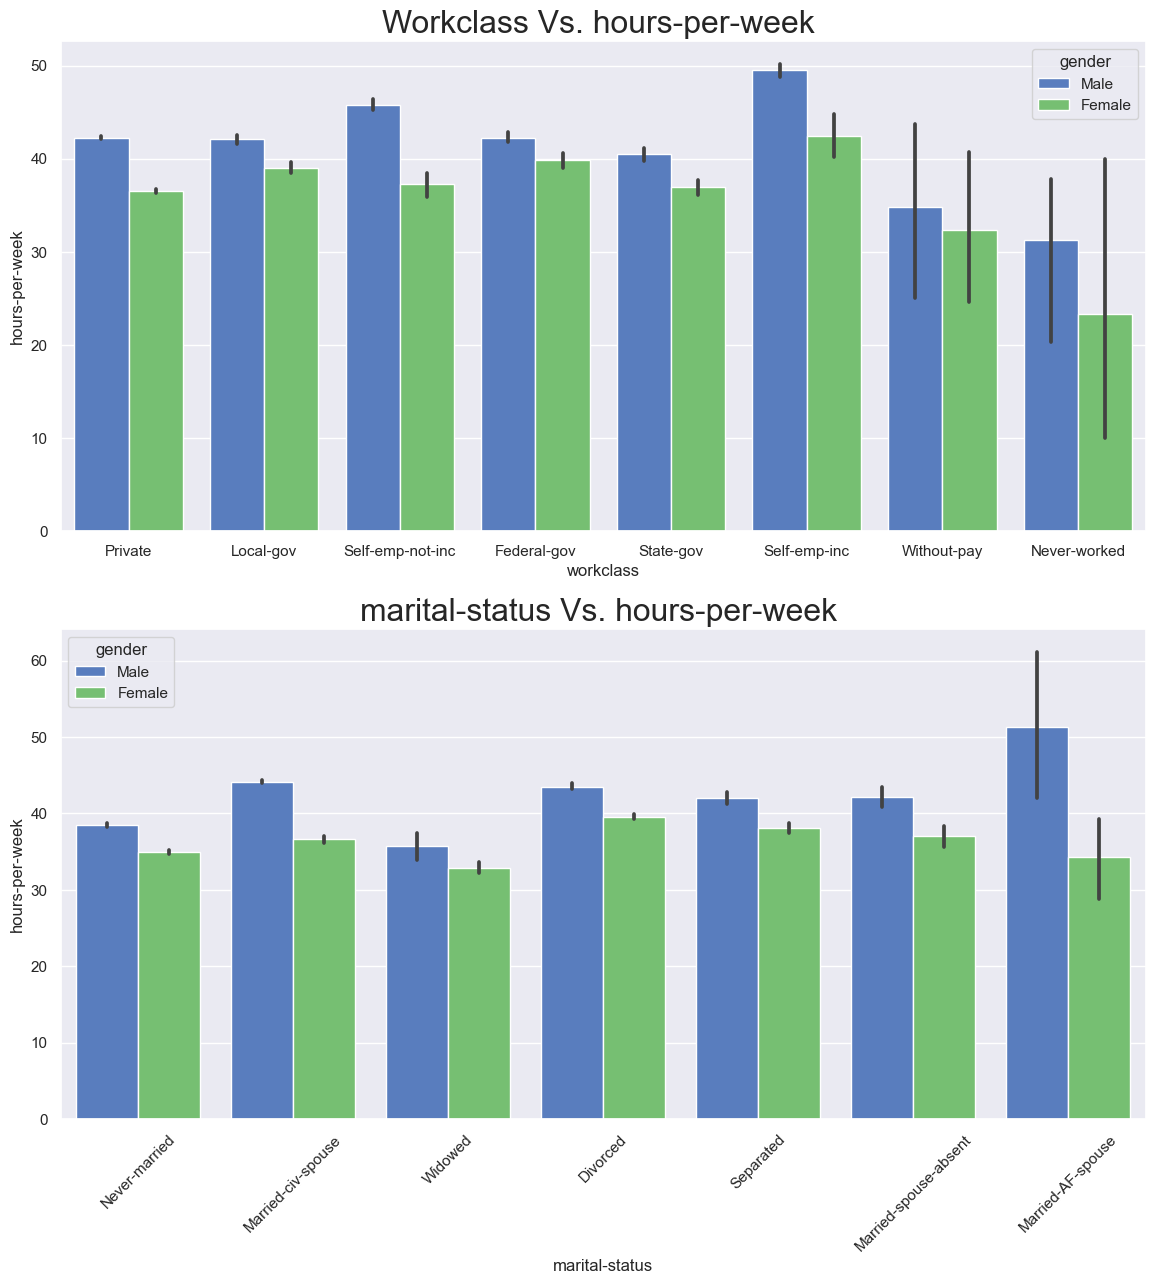

In [109]:
#Setting the figure size:
plt.figure(figsize = (14,14))

#Barplot
plt.subplot(2, 1, 1);
sns.barplot(x = 'workclass', y = 'hours-per-week', hue = 'gender', data = df);
plt.title('Workclass Vs. hours-per-week ', fontsize= 23);

#Barplot
plt.subplot(2, 1, 2);
sns.barplot(x = 'marital-status', y = 'hours-per-week',hue = 'gender', data = df);
plt.title('marital-status Vs. hours-per-week ', fontsize= 23);
plt.xticks(rotation = 45);

- Looks like in every profession men worked more hours than women. 
- In every martial status, as well, men worked more hours. 

## **Explanatory Visualization**

/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_9132/1022603714.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


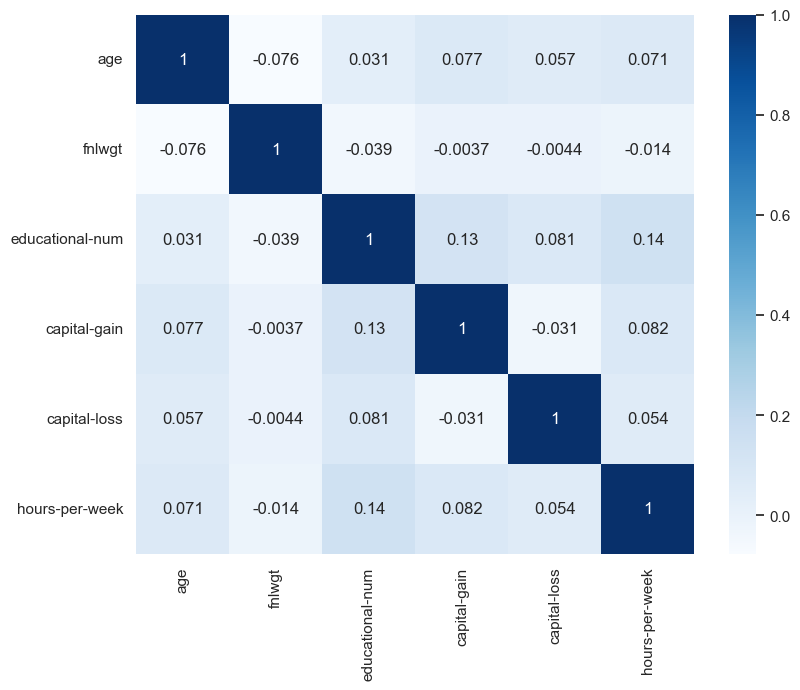

In [110]:
corr = df.corr()
#importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
#Graphing the calculated correlation. 
sns.set(rc = {'figure.figsize' : (9,7)});
sns.heatmap(corr, cmap = 'Blues', annot = True);
plt.savefig('heatmap_of_correlation_final5.png',bbox_inches = "tight", dpi = 'figure', transparent = False)


- **Columns have very weak positive and negative correlation.** 
- **We can see a more positive relationship between education and net capital gain as well as education and hours worked per week.**

- **We must also remember that correlation does not mean causation.** 

/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_9132/2165096152.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')
/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_9132/2165096152.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'workclass', y = 'hours-per-week',


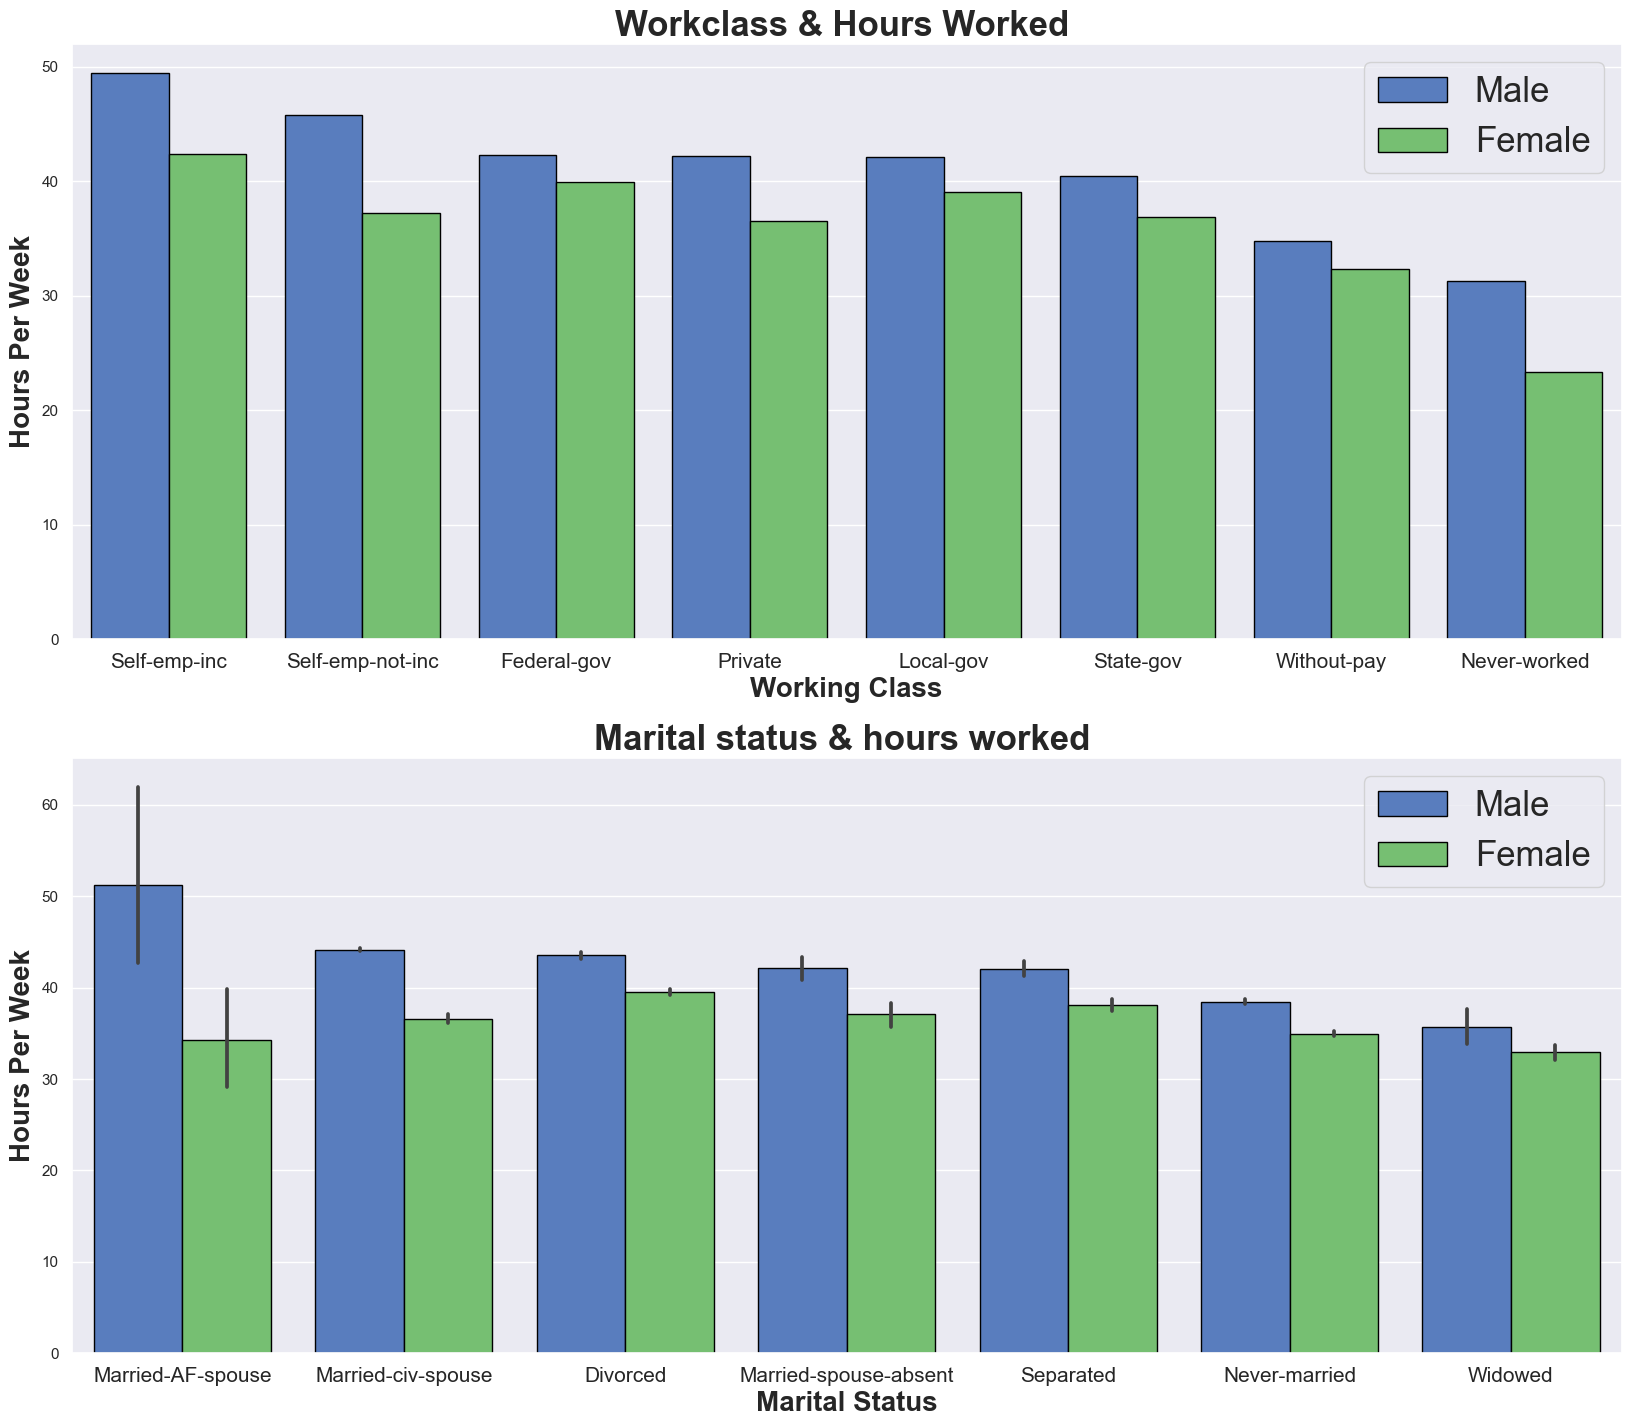

In [111]:
#Selecting a figure size for the graph:
plt.figure(figsize = (20,17))

#creating a suplot
plt.subplot(2, 1, 1)

#setting the format style. 
plt.ticklabel_format(style='plain', axis='y')
plt.style.use('seaborn-muted')

#Barplot 1 
sns.barplot(x = 'workclass', y = 'hours-per-week', 
            hue = 'gender', data = df, ci=None, edgecolor='black', order = ['Self-emp-inc','Self-emp-not-inc', 'Federal-gov','Private','Local-gov','State-gov','Without-pay','Never-worked'])

#Making the graph more presentable:
plt.title('Workclass & Hours Worked ', fontsize= 25, fontweight='bold')
plt.xlabel('Working Class', fontsize=20, fontweight='bold')
plt.ylabel('Hours Per Week', fontsize=20, fontweight='bold')
plt.xticks(rotation = 0, fontsize = 15)
plt.legend(fontsize = 25);

#creating a suplot
plt.subplot(2, 1, 2)

#Barplot
sns.barplot(x = 'marital-status', y = 'hours-per-week',hue = 'gender', data = df,  edgecolor='black',
            order = ['Married-AF-spouse','Married-civ-spouse','Divorced','Married-spouse-absent','Separated','Never-married','Widowed']);

#Making the graph more presentable:
plt.title('Marital status & hours worked ', fontsize= 25,fontweight='bold')
plt.xlabel('Marital Status', fontsize=20,fontweight='bold')
plt.ylabel('Hours Per Week', fontsize=20, fontweight='bold')
plt.xticks(rotation = 0, fontsize = 15)
plt.legend(fontsize = 25);

plt.savefig('workclass_maritalStatus_Hours_worked.png',bbox_inches = "tight", dpi = 'figure', transparent = False)



### **Observations:**
- **In Marital and Workclass status men have worked more hours than women.**
- **This shows us that men still get more freedom when it comes to working on their career over women.**
- **We can also conclude that women take higher responsibilities like taking care of their children and of the household over men.**


### **White - Male Bias**

#### **Male Bias**

/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_9132/2052305768.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


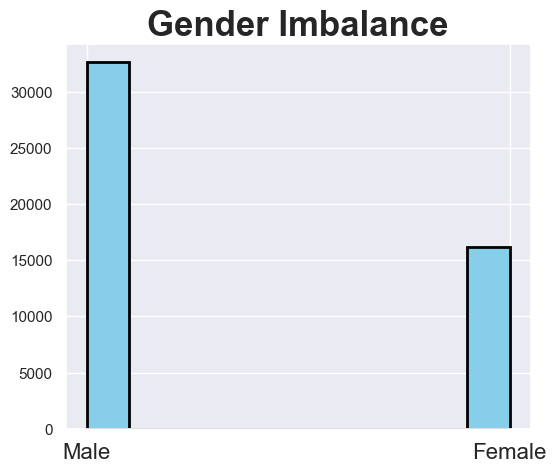

In [112]:
import seaborn as sns
#Setting the figure size
plt.figure(figsize = (6,5))

#Selecting a style for the graph
plt.style.use('seaborn-muted')

#Histogram
plt.hist(df['gender'].values, color = 'skyblue', ec="black", lw = 2)
plt.title('Gender Imbalance', fontsize=25, fontweight='bold')
plt.xticks(fontsize = 16);

plt.savefig('gender_imbalance.png',bbox_inches = "tight", dpi = 'figure', transparent = False)


#### **White Race Bias**

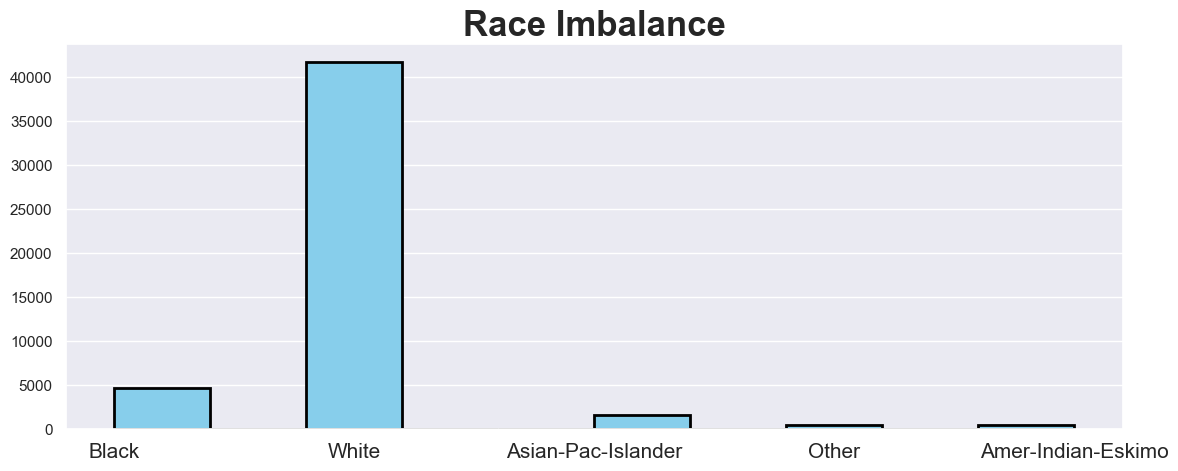

In [113]:
#Setting the figure size:
plt.figure(figsize = (30,5))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['race'].values, color = 'skyblue', ec="black", lw=2);
plt.title('Race Imbalance', fontsize=25,fontweight='bold');
plt.xticks(fontsize=15);
#Customing the graph for presentation:
plt.grid(axis = 'x');
plt.savefig('race_imbalance.png',bbox_inches = "tight", dpi = 'figure', transparent = False)


### **Observations:**
- **We see that this dataset is heavily skewed towards Men and particularly White Men.**

### Final decisions before Model Building. 
- I will be changing Income column from <=50K to Below Middle class and >50K to Middle Class.  

In [114]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [115]:
#mapping Income column
df['income'] = df['income'].map({'<=50K':'Below Middle Class',
                  '>50K': 'Middle Class'})

In [116]:
df['Net_Capital_Gain'] = df['capital-gain'] - df['capital-loss']

#droppoing capital gain and loss columns
df.drop(columns = ['capital-gain','capital-loss'], axis = 1, inplace = True)

In [117]:
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,Below Middle Class,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,Below Middle Class,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,Middle Class,0


### Creating features and targets. 

In [118]:
#Creating features and target variables. 

#feature
X = df.drop(columns= 'income')
#target
y = df['income']

In [119]:
X.shape

(48790, 13)

In [120]:
y.head()

0    Below Middle Class
1    Below Middle Class
2          Middle Class
3          Middle Class
4    Below Middle Class
Name: income, dtype: object

### Train Test Split

In [121]:
#importing train test split
from sklearn.model_selection import train_test_split

#creating train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [122]:
#importing make_column_transformer and make_column_selector
from sklearn.compose import make_column_selector, make_column_transformer

In [123]:
#making column selectors
#numeric
numeric_selector = make_column_selector(dtype_include= 'number')

#categorical
categorical_selector = make_column_selector(dtype_include= 'object')

In [124]:
#importing SimpleImputer
from sklearn.impute import SimpleImputer

#Imputing mean for numeric
mean_imputer = SimpleImputer(strategy='mean')

#Imputing most_frequent for categorical 
most_imputer = SimpleImputer(strategy='most_frequent')

In [125]:
#importing StandardScaler & OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()

ohe = OneHotEncoder(handle_unknown= 'ignore')


### Making Pipelines

In [126]:
#to better visualize the pipelines.
from sklearn import set_config
set_config(display='diagram');

#importing pipeline
from sklearn.pipeline import make_pipeline

In [127]:
#numeric pipeline
numeric_pipeline = make_pipeline(mean_imputer, scaler)

#categorical pipeline
categorical_pipeline = make_pipeline(most_imputer, ohe)

### Creating Tuples for Column Transformation

In [128]:
#nummeric tuple 
num_tuple = (numeric_pipeline, numeric_selector)

#categorical tuple 
cat_tuple = (categorical_pipeline, categorical_selector)


### Instantiating preprocessor

In [129]:
#preprocessor
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder= 'passthrough')

#displaying the preprocessor
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x168f4e4f0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x168f4e250>)])

#### Fitting the preprocessor on to X_train

In [130]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x168f4e4f0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x168f4e250>)])

#### Transforming the X_train and X_test

In [131]:
#X_train transformed
X_train_processed = preprocessor.transform(X_train)

#X_test transformed
X_test_processed = preprocessor.transform(X_test)

In [132]:
X_train_processed.shape

(36592, 104)

In [133]:
X_test_processed.shape

(12198, 104)

## Machine Learning Models

### Logistic Regression

##### Default Logistic Regression Model

In [134]:
import warnings
#importing Logistic Regression. 
from sklearn.linear_model import LogisticRegression

#initializing the model 
log_reg = LogisticRegression()

#making a pipeline
log_reg_pipeline = make_pipeline(preprocessor, log_reg)

#fitting the data
log_reg_pipeline.fit(X_train, y_train)

#predicting
log_default_pred_X_test = log_reg_pipeline.predict(X_test)

#printing prediction
log_default_pred_X_test

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['Below Middle Class', 'Below Middle Class', 'Middle Class', ...,
       'Below Middle Class', 'Below Middle Class', 'Below Middle Class'],
      dtype=object)

In [136]:
#model scores
print("Log default model train score" + " "+ str(log_reg_pipeline.score(X_train, y_train)))
print("Log default model test score" + " "+ str(log_reg_pipeline.score(X_test, y_test)))

Log default model train score 0.847534980323568
Log default model test score 0.8470241023118544


In [137]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix

#predicting
pred = log_reg_pipeline.predict(X_test)

#creating a confusion matrix
c_mat = confusion_matrix(y_test, pred, normalize='true')

#turning the confusion matrix into a DataFrame
cmat_df = pd.DataFrame(c_mat)
cmat_df

,0,1
0,0.935693,0.064307
1,0.433447,0.566553


With the default Logistic Regression version the True Negative is good, but the False Negative is higher than acceptable. 

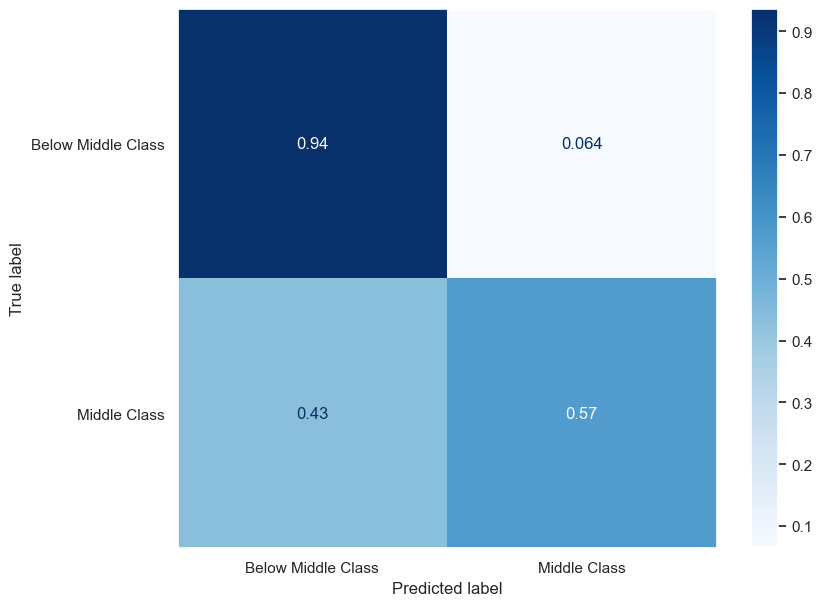

In [138]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred, normalize='true', cmap = 'Blues' );
plt.grid(None)

### Hyper Tuning Logistic Regression 

##### L1 Tuning
##### Solver = Saga

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test Scores:


/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{0.001: 0.8184948352188883,
 0.01: 0.8403836694540089,
 0.1: 0.8463682570913265,
 1.0: 0.8471060829644204,
 10.0: 0.8471880636169864,
 100.0: 0.8473520249221184,
 1000.0: 0.8473520249221184}

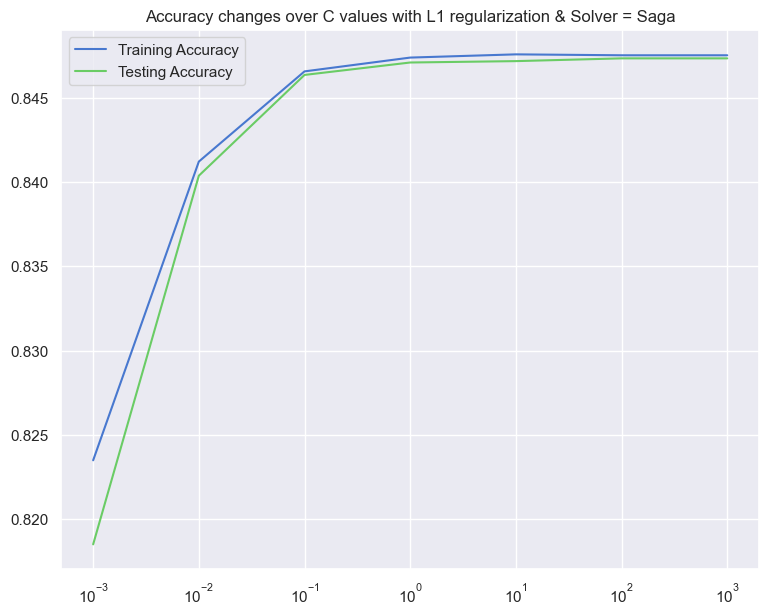

In [139]:
#creating a list of C values and two empty lists for the scores
C_values = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]

#creating an emtpy train score variable
train_score = []

#creating an emtpy test score variable
test_score = []

#creating a loop to get the best c_value
for c in C_values:
  #Initializing logistic regression
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='saga', penalty='l1')
  #creating a pipeline
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  #fitting the model 
  log_reg_pipe.fit(X_train, y_train)
  #append the scores to train_score variable
  train_score.append(log_reg_pipe.score(X_train, y_train))
  #append the scores to test_score variable
  test_score.append(log_reg_pipe.score(X_test, y_test))

#plotting the scores.
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L1 regularization & Solver = Saga')
ax.legend()
ax.set_xscale('log')

#printing the resutls. 
print('Test Scores:')
{c:score for c,score in zip(C_values, test_score)}

C = 100 & 1000 gave the best result at 84.7%.


##### L1 Tuning
##### Solver = liblinear

Test Scores:


{0.001: 0.8178389899983604,
 0.01: 0.8403016888014428,
 0.1: 0.8464502377438924,
 1.0: 0.8471060829644204,
 10.0: 0.8471060829644204,
 100.0: 0.8473520249221184,
 1000.0: 0.8471880636169864}

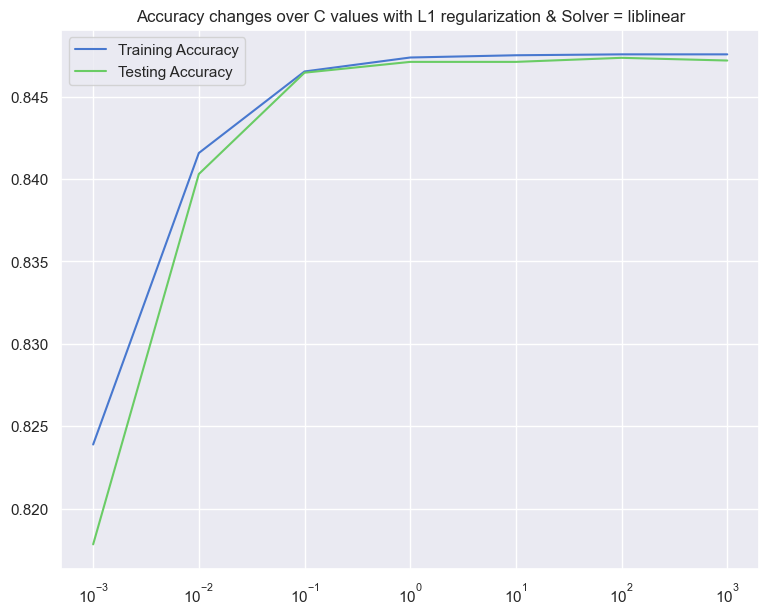

In [140]:
#creating a list of C values and two empty lists for the scores
C_values = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
train_score = []
test_score = []

for c in C_values:
  #Initializing logistic regression
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  #creating a pipeline
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  #fitting the model 
  log_reg_pipe.fit(X_train, y_train)
  #append the scores to the train_score variable
  train_score.append(log_reg_pipe.score(X_train, y_train))
  #append the scores to the test_score variable
  test_score.append(log_reg_pipe.score(X_test, y_test))

#plotting the scores
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L1 regularization & Solver = liblinear')
ax.legend()
ax.set_xscale('log')
plt.savefig('workclass_maritalStatus_Hours_worked.png',bbox_inches = "tight", dpi = 'figure', transparent = False)

#printing the resutls. 
print('Test Scores:')
{c:score for c,score in zip(C_values, test_score)}


Best: C = 100.0 with accuracy of 84.7%.

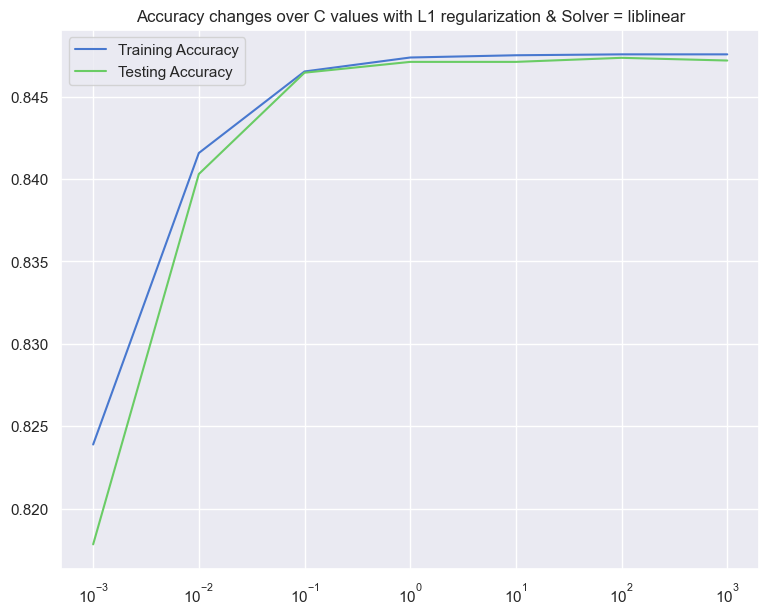

In [141]:
#plotting the scores
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L1 regularization & Solver = liblinear')
ax.legend()
ax.set_xscale('log')
plt.savefig('liblinear_l1_log_graph.png',bbox_inches = "tight", dpi = 'figure', transparent = False)

#printing the resutls. 

##### L2 Tuning
##### Solver = Saga

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test Scores:


/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{0.001: 0.8291523200524676,
 0.01: 0.8434989342515167,
 0.1: 0.8470241023118544,
 1.0: 0.8466961797015904,
 10.0: 0.8472700442695524,
 100.0: 0.8473520249221184,
 1000.0: 0.8473520249221184}

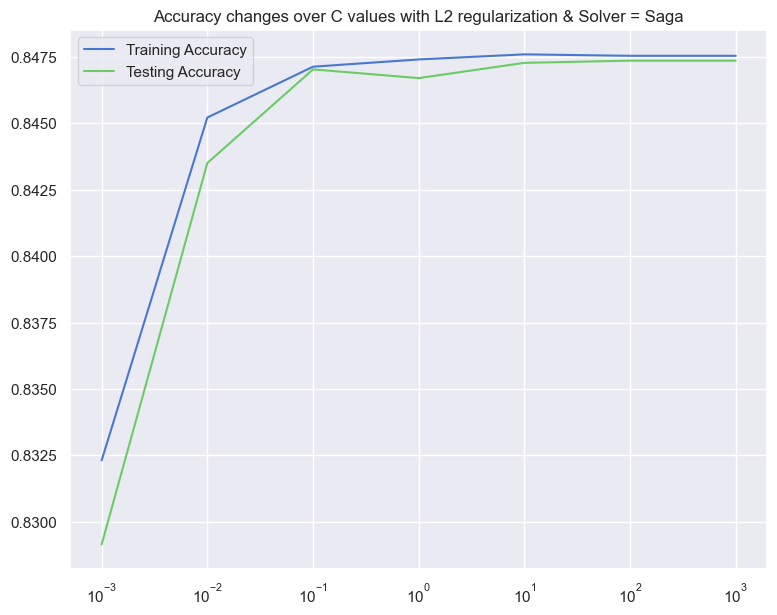

In [142]:
#creating a list of C values and two empty lists for the scores
C_values = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
train_score = []
test_score = []

for c in C_values:
  #Initializing logistic regression
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='saga', penalty='l2')
  #creating a pipeline
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  #fitting the model
  log_reg_pipe.fit(X_train, y_train)
  #append the scores to the train_score variable
  train_score.append(log_reg_pipe.score(X_train, y_train))
  #append the scores to the test_score variable
  test_score.append(log_reg_pipe.score(X_test, y_test))

#plotting the scores.
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L2 regularization & Solver = Saga')
ax.legend()
ax.set_xscale('log')

#printing the resutls. 
print('Test Scores:')
{c:score for c,score in zip(C_values, test_score)}



C = 100 & 1000 with accuracy of 84.7%

##### L2 Tuning
##### Solver = Liblinear

Test Scores:


{0.001: 0.8299721265781276,
 0.01: 0.8441547794720446,
 0.1: 0.8470241023118544,
 1.0: 0.8470241023118544,
 10.0: 0.8472700442695524}

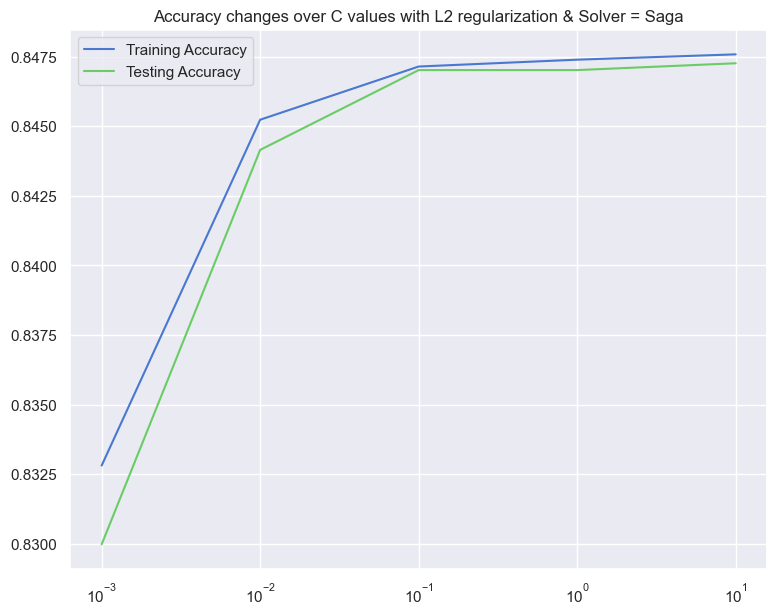

In [144]:
#creating a list of C values and two empty lists for the scores
C_values = [0.001,0.01,0.1,1.0,10.0]
train_score = []
test_score = []

for c in C_values:
  #Initializing logistic regression
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  #creating a pipeline
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  #fitting the model 
  log_reg_pipe.fit(X_train, y_train)
  #append the scores to the train_score variable
  train_score.append(log_reg_pipe.score(X_train, y_train))
  #append the scores to the test_score variable
  test_score.append(log_reg_pipe.score(X_test, y_test))

#plotting the scores.
fig, ax = plt.subplots(1,1)
ax.plot(C_values, train_score, label = 'Training Accuracy')
ax.plot(C_values, test_score, label = 'Testing Accuracy')
ax.set_xticks(C_values)
ax.set_title('Accuracy changes over C values with L2 regularization & Solver = Saga')
ax.legend()
ax.set_xscale('log')

print('Test Scores:')
{c:score for c,score in zip(C_values, test_score)}


#### All the models have a higher test score than its training score. With L2 pentaly and sage as solver the difference between the best test and training score is larger than when penalty is equal to L1.  

### Logistic Regression Model Choice: 
- Penatly: L1
- C = 100 or 1000
- Solver = liblinear or saga

### Log Reg Tuned Model

In [145]:
#initializing the model 
log_reg_tuned = LogisticRegression(C=1.0, max_iter=500, solver='liblinear', penalty='l1')

#making a pipeline
tuned_log_reg_pipeline = make_pipeline(preprocessor, log_reg_tuned)

#fitting the data
tuned_log_reg_pipeline.fit(X_train, y_train)

#predicting
tuned_log_pred_X_test = tuned_log_reg_pipeline.predict(X_test)

#printing prediction
tuned_log_pred_X_test

array(['Below Middle Class', 'Below Middle Class', 'Middle Class', ...,
       'Below Middle Class', 'Below Middle Class', 'Below Middle Class'],
      dtype=object)

In [146]:
#confusion matrix
c_mat = confusion_matrix(y_test, tuned_log_pred_X_test, normalize='true')
#converting the matrix into a dataframe
cmat_df = pd.DataFrame(c_mat)
cmat_df

,0,1
0,0.935585,0.064415
1,0.432765,0.567235


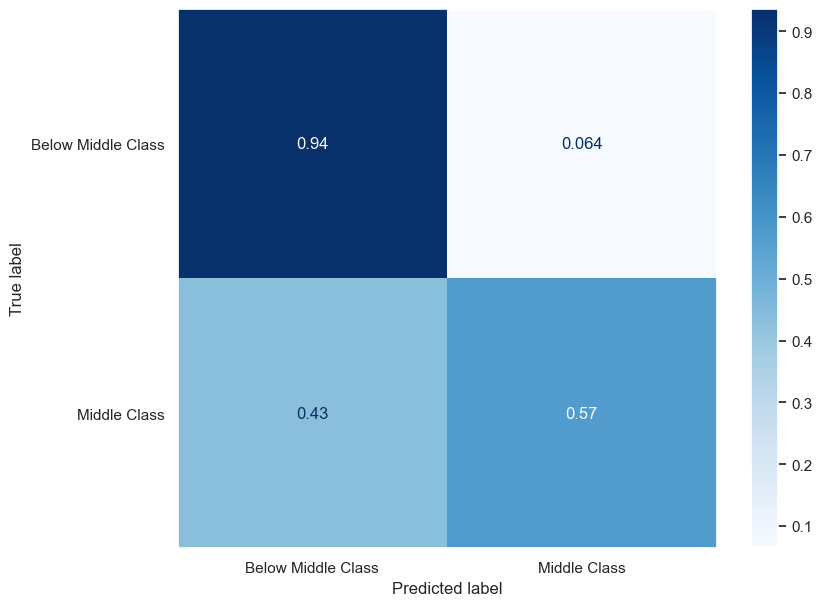

In [147]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, tuned_log_pred_X_test, normalize='true', cmap = 'Blues' );
plt.grid(None)
plt.savefig('confusion_matrix_tune_log.png',bbox_inches = "tight", dpi = 'figure', transparent = False)


This tuned logistic regression model is better than the default one as its False Positive and False Negatives are a little lower. 

## KNN

### KNN Default Model

In [148]:
#importing KNN Classifier model. 
from sklearn.neighbors import KNeighborsClassifier

#initializing KNN models. 
knn = KNeighborsClassifier(n_neighbors=1)

#creating a pipeline 
knn_prep_pipe = make_pipeline(preprocessor, knn) 

#fitting the data 
knn_prep_pipe.fit(X_train, y_train) 

#making predictions 
knn_default_predictions_test = knn_prep_pipe.predict(X_test) 
knn_default_predictions_test

array(['Below Middle Class', 'Middle Class', 'Below Middle Class', ...,
       'Below Middle Class', 'Middle Class', 'Below Middle Class'],
      dtype=object)

In [149]:
#printing the scores of both training and testing model 
print("Log default model train score" + " "+ str(knn_prep_pipe.score(X_train, y_train)))
print("Log default model test score" + " "+ str(knn_prep_pipe.score(X_test, y_test)))

Log default model train score 0.9999726716222125
Log default model test score 0.7981636333825217


In [150]:
#creating a confusion matrix
knn_c_mat = confusion_matrix(y_test, knn_default_predictions_test, normalize='true')

#converting the matrix into a dataframe
cmat_df = pd.DataFrame(knn_c_mat)
cmat_df

,0,1
0,0.869335,0.130665
1,0.426962,0.573038


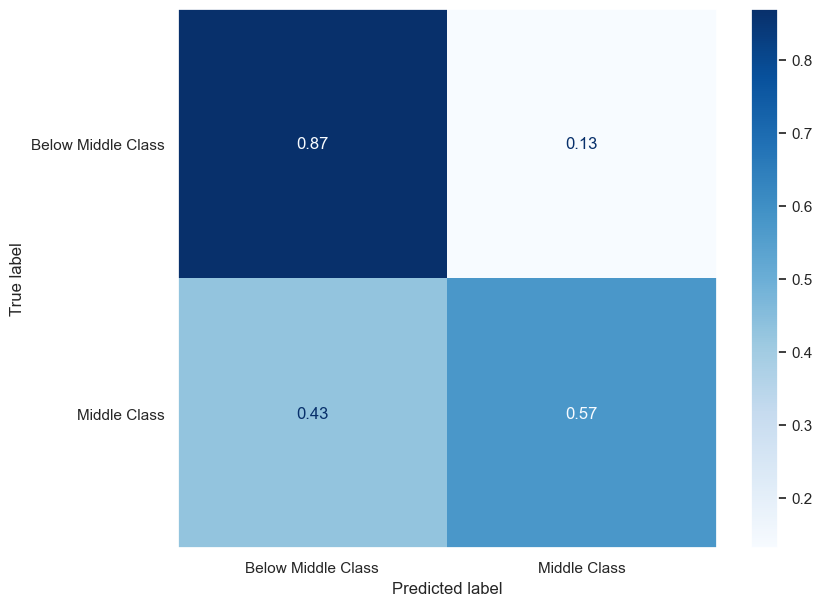

In [151]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, knn_default_predictions_test, normalize='true', cmap = 'Blues' );
plt.grid(None)

This model is better than the Log Reg models as the False Negative is lower. 

#### Tuning the KNN Model.

In [152]:
#importing the accuracy score
from sklearn.metrics import accuracy_score

#setting a knn range
knn_range = range(1,20)
#creating an empty test_accuracy variable
test_accuracy = []
#Setting best_accuracy and best_k variables to zero as they will be appended soon
best_accuracy = 0
best_k = 0

#creating a loop to find the best n_neighbors for the model. 
for k in knn_range:
  #initialing KNN
  knn = KNeighborsClassifier(n_neighbors=k)

  #creating the pipeline of preprocessor and KNN
  knn_prep_pipe = make_pipeline(preprocessor, knn)
  
  #fitting the model. 
  knn_prep_pipe.fit(X_train, y_train)

  #predicting and finding the accuracy of the model. 
  predict_test = knn_prep_pipe.predict(X_test)

  #creating an accuracy variable
  acc = accuracy_score(y_test, predict_test)

  #finding the best accuracy and the best k values
  if acc > best_accuracy:
    best_accuracy = acc
    best_k = k

  #appending the best values to test_accuracy
  test_accuracy.append(acc)


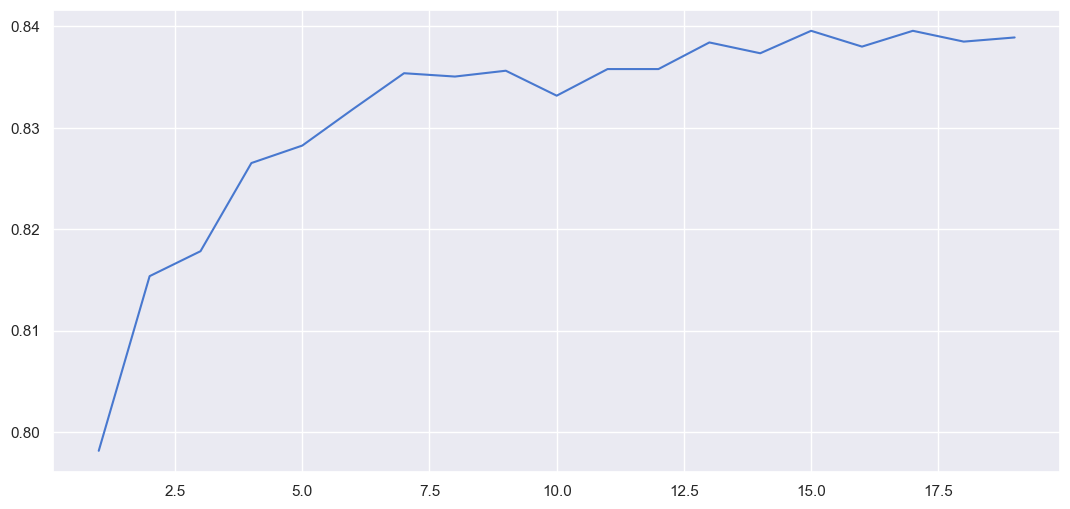

The best accuracy 0.839563862928349. 
The best n_neighbor score 15. 


In [153]:
#plotting the findings
plt.figure(figsize = (13,6))
plt.plot(knn_range, test_accuracy, label = 'Best KNN Scores')
plt.savefig('knn1_tuned_model.png',bbox_inches = "tight", dpi = 'figure', transparent = False)

plt.show()
#best k value and best accuracy
print(f'The best accuracy {best_accuracy}. \nThe best n_neighbor score {best_k}. ')


#printing the resutls. 

#### Creating the tuned KNN model.

In [154]:
#creating a pipeline
tuned_knn_model = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors= 16))

#fitting the model 
tuned_knn_model.fit(X_train, y_train)

#making the predictions
tuned_knn_predict = tuned_knn_model.predict(X_test)
tuned_knn_predict

array(['Below Middle Class', 'Below Middle Class', 'Below Middle Class',
       ..., 'Below Middle Class', 'Below Middle Class',
       'Below Middle Class'], dtype=object)

In [155]:
#creating a confusion matrix
tuned_knn_c_mat = confusion_matrix(y_test, tuned_knn_predict, normalize='true')

#converting the matrix into a dataframe
tuned_cmat_df = pd.DataFrame(tuned_knn_c_mat)
tuned_cmat_df

,0,1
0,0.932132,0.067868
1,0.459727,0.540273


Here the False Negative when down by 2 percent .

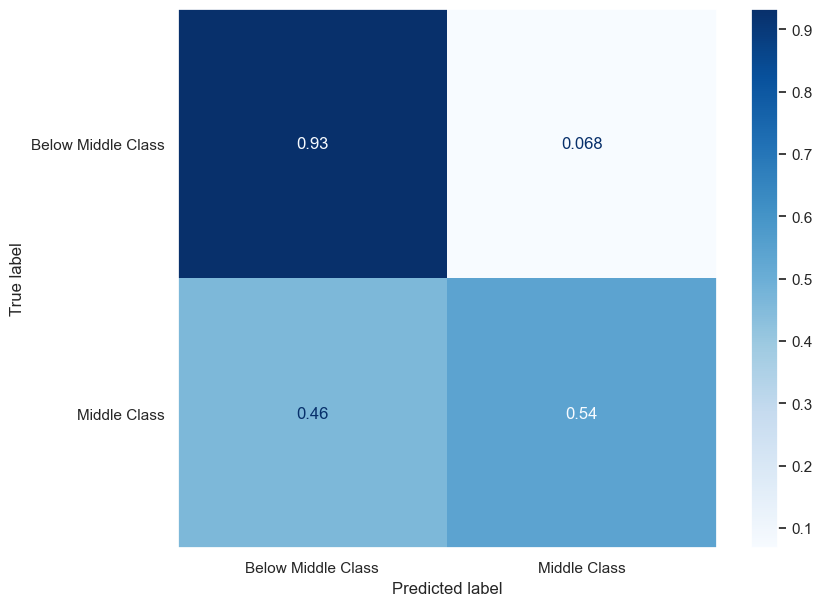

In [156]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test, tuned_knn_predict, normalize='true', cmap = 'Blues');
plt.grid(False)
plt.savefig('knn_confusion_matrix.png',bbox_inches = "tight", dpi = 'figure', transparent = False)

KNN is giving us a good model as well, but the False Negative is very high. 

## Using PCA
#### Understanding that most of the columns are categorical, PCA won't be that helpful. However it is better than the default KNN model. 

In [157]:
#creating a new copy of the df
df2 = df.copy()

df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,Below Middle Class,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,Below Middle Class,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,Middle Class,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,Middle Class,7688
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,30,United-States,Below Middle Class,0


In [158]:
df2.isna().sum()

age                    0
workclass           2795
fnlwgt                 0
education              0
educational-num        0
marital-status         0
occupation          2805
relationship           0
race                   0
gender                 0
hours-per-week         0
native-country       856
income                 0
Net_Capital_Gain       0
dtype: int64

#### Splitting data into feature and target

In [160]:
#creating X and y 
df2_X = df2.drop(columns=['income'])
df2_y = df2['income']

df2_y.head()

0    Below Middle Class
1    Below Middle Class
2          Middle Class
3          Middle Class
4    Below Middle Class
Name: income, dtype: object

In [161]:
df2_preprocessor = preprocessor.fit_transform(df2_X)


In [162]:
print(df2_preprocessor)

  (0, 0)	-0.995947382552689
  (0, 1)	0.35158449759676963
  (0, 2)	-1.1979702922823274
  (0, 3)	-0.03436618503476829
  (0, 4)	-0.13271438808533073
  (0, 8)	1.0
  (0, 14)	1.0
  (0, 33)	1.0
  (0, 42)	1.0
  (0, 53)	1.0
  (0, 58)	1.0
  (0, 62)	1.0
  (0, 101)	1.0
  (1, 0)	-0.04762043495812059
  (1, 1)	-0.9454520018156202
  (1, 2)	-0.4197661108030509
  (1, 3)	0.772566856904857
  (1, 4)	-0.13271438808533073
  (1, 8)	1.0
  (1, 24)	1.0
  (1, 31)	1.0
  (1, 40)	1.0
  (1, 50)	1.0
  (1, 60)	1.0
  (1, 62)	1.0
  :	:
  (48788, 1)	0.11192417791091094
  (48788, 2)	-0.4197661108030509
  (48788, 3)	-1.648232268914019
  (48788, 4)	-0.13271438808533073
  (48788, 8)	1.0
  (48788, 24)	1.0
  (48788, 33)	1.0
  (48788, 36)	1.0
  (48788, 53)	1.0
  (48788, 60)	1.0
  (48788, 62)	1.0
  (48788, 101)	1.0
  (48789, 0)	0.9736547393744915
  (48789, 1)	0.9303312201314612
  (48789, 2)	-0.4197661108030509
  (48789, 3)	-0.03436618503476829
  (48789, 4)	1.8760066912523956
  (48789, 9)	1.0
  (48789, 24)	1.0
  (48789, 31)	1.0
  

In [163]:
#importing PCA
from sklearn.decomposition import PCA

#initializing pca
pca = PCA(n_components= 0.85)

pcs = pca.fit_transform(df2_preprocessor)

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

### PCA did not work on this dataset.

## Creating a KMeans model

In [164]:
#importing KMeans
from sklearn.cluster import KMeans

#creating a copy of the dataset. 
df3 = df2.copy()

df3.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,Below Middle Class,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,Below Middle Class,0


In [165]:
df3_preprocessed = preprocessor.fit_transform(df3)

In [166]:
df3_preprocessed.shape

(48790, 106)

In [167]:
#initializing KMeans
kmeans = KMeans(n_clusters=2)

In [168]:
kmeans.fit(df3_preprocessed)

KMeans(n_clusters=2)

### Looking into the Inertia and Silhouetter Score to find the best number of clustes. 

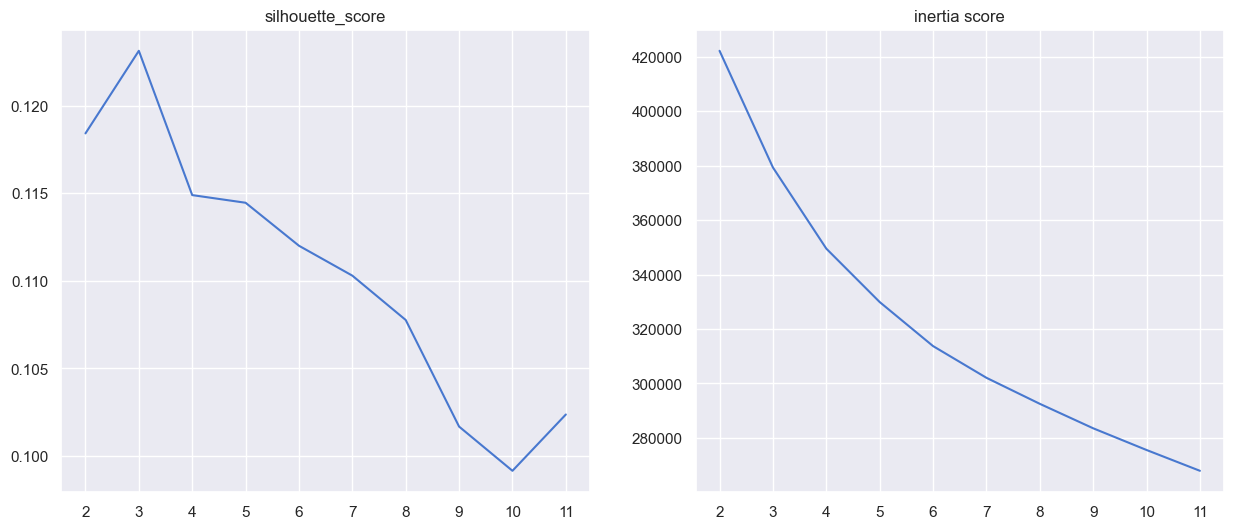

In [169]:
from sklearn.metrics import silhouette_score

# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,12)
silh_score = []
inertias = []

#looping
for k in ks:
  kmeans = KMeans(n_clusters = k, random_state= 42)
  kmeans.fit(df3_preprocessed)
  #append silhouette_score
  silh_score.append(silhouette_score(df3_preprocessed, kmeans.labels_))
  #append inertia
  inertias.append(kmeans.inertia_)

#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize = (15,6))
axes[0].plot(ks, silh_score)
axes[0].set_title('silhouette_score')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('inertia score')
axes[1].set_xticks(ks)

Looking at the Silhouette Score and Inertia, I will go with 4 clusters as it seem to have a high Silhouette Score and the diminishing returns for the inertia starts to happen after 4 clusters. 

#### Creating a Kmeans model with 4 clusters. 

In [170]:
#initializing KMeans
kmeans = KMeans(n_clusters=4)

kmeans.fit(df3_preprocessed)

df3['cluster'] = kmeans.labels_

df3['cluster'].value_counts()

cluster_group = df3.groupby('cluster', as_index = False).mean()
cluster_group

/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_9132/1803423548.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_group = df3.groupby('cluster', as_index = False).mean()


,cluster,age,fnlwgt,educational-num,hours-per-week,Net_Capital_Gain
0,0,46.503528,180421.375071,8.595931,42.369251,406.395313
1,1,46.610656,185547.946721,13.024590,50.475410,99999.000000
2,2,26.815085,203926.353435,9.503418,34.986444,72.413625
3,3,42.863678,184145.173983,13.280731,44.951386,1254.537703


The cluster shows us the four groups we can see that dataset in. This clustering shows clearly that the most hours per week spent on the job meant you have a higher Capital Gain. This also happened during the time the indiviudal is in their mid fourties. The clustering also shows us that young workers worked less than the rest.

### Using Ordinal Encoder to see if we can build a better model. 

In [171]:
#importing Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

#initiating Ordinal Encoder
OE = OrdinalEncoder()

OE

OrdinalEncoder()

In [172]:
#numeric pipeline
numeric_pipeline = make_pipeline(mean_imputer, scaler)

#categorical pipeline
OE_categorical_pipeline = make_pipeline(most_imputer, OrdinalEncoder())

In [ ]:
OE_categorical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder', OrdinalEncoder())])

In [173]:
#numeric tuple
num_tuple = (mean_imputer,numeric_selector)
#OE categorical tuple 
OE_cat_tuple = (OE_categorical_pipeline, categorical_selector)

OE_cat_tuple

(Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder', OrdinalEncoder())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x168f4e250>)

In [174]:
#OE preprocessor 
OE_preprocessor = make_column_transformer(num_tuple, OE_cat_tuple, remainder= 'passthrough')

OE_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer', SimpleImputer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x168f4e4f0>),
                                ('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x168f4e250>)])

### Creating Log Reg Model with Ordinal Encoder. 
#### I will be using the already tuned Logistic Regression model. 

In [175]:
#initializing the model 
log_reg_tuned = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', penalty='l2')

#making a pipeline
tuned_log_reg_pipeline = make_pipeline(OE_preprocessor, log_reg_tuned)

#fitting the data
tuned_log_reg_pipeline.fit(X_train, y_train)

#predicting
tuned_log_pred_X_test = tuned_log_reg_pipeline.predict(X_test)

#printing prediction
tuned_log_pred_X_test

array(['Below Middle Class', 'Below Middle Class', 'Middle Class', ...,
       'Below Middle Class', 'Below Middle Class', 'Below Middle Class'],
      dtype=object)

In [176]:
#confusion matrix
c_mat = confusion_matrix(y_test, tuned_log_pred_X_test, normalize='true')
#converting the matrix into a dataframe
cmat_df = pd.DataFrame(c_mat)
cmat_df

,0,1
0,0.991476,0.008524
1,0.813311,0.186689


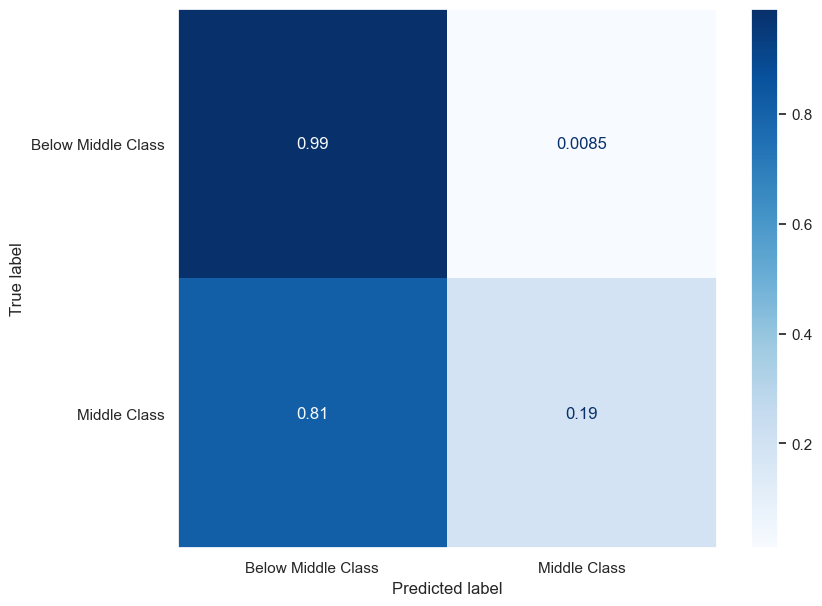

In [177]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, tuned_log_pred_X_test, normalize='true', cmap = 'Blues' );
plt.grid(None)

This was a worse model than the one we did with One Hot Encoder. False Negative is very high.

### Trying the same thing with KNN model as well. Using the tuned KNN model. 

In [178]:
#creating a pipeline
OE_knn_model = make_pipeline(OE_preprocessor, KNeighborsClassifier(n_neighbors= 15))

#fitting the model 
OE_knn_model.fit(X_train, y_train)

#making the predictions
OE_tuned_knn_predict = OE_knn_model.predict(X_test)
OE_tuned_knn_predict

array(['Below Middle Class', 'Below Middle Class', 'Middle Class', ...,
       'Below Middle Class', 'Below Middle Class', 'Below Middle Class'],
      dtype=object)

In [179]:
#creating a confusion matrix
OE_tuned_knn_c_mat = confusion_matrix(y_test, OE_tuned_knn_predict, normalize='true')

#converting the matrix into a dataframe
OE_tuned_cmat_df = pd.DataFrame(tuned_knn_c_mat)
OE_tuned_cmat_df

,0,1
0,0.932132,0.067868
1,0.459727,0.540273


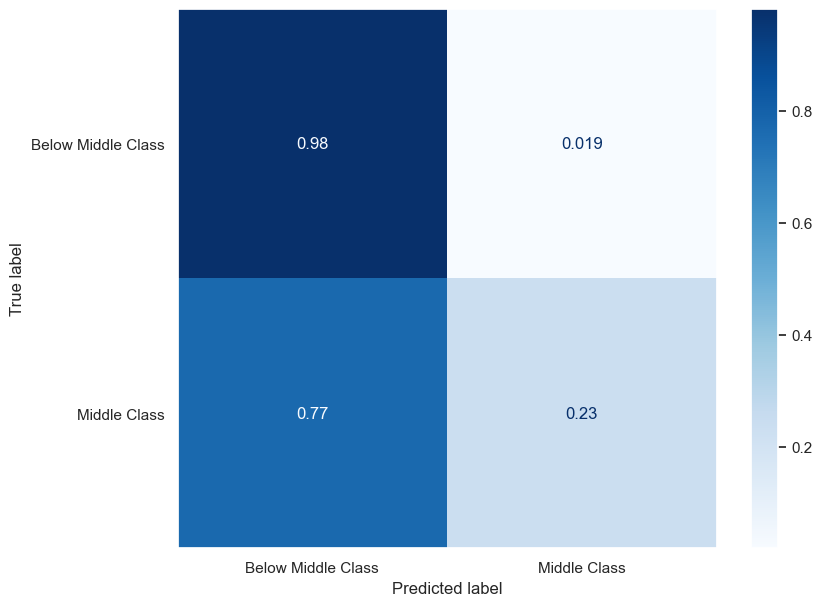

In [180]:
#Importing ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, OE_tuned_knn_predict, normalize='true', cmap = 'Blues' );
plt.grid(None)

- This model was able to lower the False Negative.
- This model is worse than the tuned Log Reg model with One Hot Encoder. 

### Clustering with OneHotEncode

In [187]:
#importing KMeans
from sklearn.cluster import KMeans

#creating a copy of the dataset. 
df3 = df2.copy()

df3.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,Below Middle Class,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,Below Middle Class,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,Middle Class,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,Middle Class,7688
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,30,United-States,Below Middle Class,0


In [188]:
df3_preprocessed = OE_preprocessor.fit_transform(df3)

df3_preprocessed.shape

(48790, 14)

In [189]:
df3_p = pd.DataFrame(data=df3_preprocessed, columns= df3.columns)

df3_p.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
48785,27.0,257302.0,12.0,38.0,0.0,3.0,7.0,2.0,12.0,5.0,4.0,0.0,38.0,0.0
48786,40.0,154374.0,9.0,40.0,0.0,3.0,11.0,2.0,6.0,0.0,4.0,1.0,38.0,1.0
48787,58.0,151910.0,9.0,40.0,0.0,3.0,11.0,6.0,0.0,4.0,4.0,0.0,38.0,0.0
48788,22.0,201490.0,9.0,20.0,0.0,3.0,11.0,4.0,0.0,3.0,4.0,1.0,38.0,0.0
48789,52.0,287927.0,9.0,40.0,15024.0,4.0,11.0,2.0,3.0,5.0,4.0,0.0,38.0,1.0


In [190]:
df3_p.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
0,25.0,226802.0,7.0,40.0,0.0,3.0,1.0,4.0,6.0,3.0,2.0,1.0,38.0,0.0
1,38.0,89814.0,9.0,50.0,0.0,3.0,11.0,2.0,4.0,0.0,4.0,1.0,38.0,0.0


In [191]:
#initializing KMeans
kmeans = KMeans(n_clusters=4)

kmeans.fit(df3_p)

df3_p['cluster'] = kmeans.labels_

df3_p['cluster'].value_counts()

2    22094
1    15692
0     9026
3     1978
Name: cluster, dtype: int64

In [192]:
df3_p.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain,cluster
0,25.0,226802.0,7.0,40.0,0.0,3.0,1.0,4.0,6.0,3.0,2.0,1.0,38.0,0.0,2
1,38.0,89814.0,9.0,50.0,0.0,3.0,11.0,2.0,4.0,0.0,4.0,1.0,38.0,0.0,1
2,28.0,336951.0,12.0,40.0,0.0,1.0,7.0,2.0,10.0,0.0,4.0,1.0,38.0,1.0,0
3,44.0,160323.0,10.0,40.0,7688.0,3.0,15.0,2.0,6.0,0.0,2.0,1.0,38.0,1.0,2
4,18.0,103497.0,10.0,30.0,0.0,3.0,15.0,4.0,9.0,3.0,4.0,0.0,38.0,0.0,1


In [193]:
cluster_group = df3_p.groupby('cluster', as_index = False).mean()
cluster_group

,cluster,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,Net_Capital_Gain
0,0,37.334367,307352.640372,10.001773,40.542322,905.780412,3.063705,10.245181,2.662863,6.212497,1.424108,3.627299,0.690117,35.994239,0.233991
1,1,39.555315,86512.156640,10.178945,40.661866,1061.286834,3.139307,10.342085,2.571055,6.154028,1.425185,3.661738,0.659126,36.847948,0.237892
2,2,38.840817,188307.279171,10.080293,40.274147,981.550511,3.091020,10.297818,2.621526,6.141305,1.460080,3.700733,0.661944,36.392007,0.245406
3,3,35.408999,486236.480789,9.619312,39.717391,967.830637,3.047017,9.944388,2.748231,6.017189,1.491405,3.535389,0.716380,35.659757,0.209302


Nothing of value was found. 